<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

# С чего все началось

Для ознакомления с тем, что такое перцептрон, да и в целом как все начиналось, можно почитать статью на Википедии. Там представлена краткая история, довольно подробное объяснение, и в целом всё, что нам потребуется, и даже больше. В статье, помимо прочего, в разделе "Историческая классификация" говорится следующее:

*"Понятие перцептрона имеет интересную, но незавидную историю. В результате неразвитой терминологии нейронных сетей прошлых лет, резкой критики и непонимания задач исследования перцептронов, а иногда и ложного освещения прессой, изначальный смысл этого понятия исказился."*

И далее:

*"Сравнивая разработки Розенблатта и современные обзоры и статьи, можно выделить 4 довольно обособленных класса перцептронов:"*
1. **Перцептрон с одним скрытым слоем**: Классический перцептрон, описанный в книгах Розенблатта. Содержит по одному слою S-, A- и R-элементов.
2. **Однослойный перцептрон**: Простейшая сеть прямого распространения с входами, напрямую соединёнными с выходами. Это линейный классификатор, который не может решать задачи с нелинейными зависимостями, такие как XOR например.
3. **Многослойный перцептрон (по Розенблатту)**: Перцептрон с дополнительными слоями A-элементов. Анализировался Розенблаттом в его книге.
4. **Многослойный перцептрон (по Румельхарту)**: Включает дополнительные слои A-элементов и обучается методом обратного распространения ошибки. Является расширением перцептрона Розенблатта.

Также полезно будет ознакомиться с разделами "Алгоритмы обучения" и "Традиционные заблуждения". Пересказывать всю статью не вижу смысла. Разбирать подробно различные реализации и писать для них код также не имеет смысла, так как с тех пор многое изменилось, хотя путаница в терминологии тех лет, на мой взгляд, всё ещё остаётся. Лично для себя я выделил несколько понятий, которые на мой взгляд являются ключевыми. Эти понятия я и собираюсь разобрать, и на их основе писать свою реализацию нейронной сети.

Итак, по порядку:
1. **Перцептрон/нейрон (однослойный перцептрон)**: Простейшая сеть прямого распространения с входами, напрямую соединёнными с выходами. Это линейный классификатор, который не может решать задачи с нелинейными зависимостями, такие как XOR например. Для простоты такой объект я буду называть перцептроном или нейроном.
2. **Нейронная сеть (многослойный перцептрон)**: Включает дополнительные слои и обучается методом обратного распространения ошибки. Является расширением перцептрона Розенблатта. Для простоты это я буду называть нейронной сетью.
3. **Общий алгоритм обучения**: обучение с учителем, метод обратного распространения ошибки.

Эти три пункта я взял за основу, и вокруг них будет написан весь код. Как видите, по сравнению со статьей на Википедии, я значительно всё упростил, но, забегая вперед, скажу, что в финальной реализации нам даже такое, казалось бы, основное понятие как нейрон не особенно будет нужно, потому что все вычисления будут происходить на уровне слоев.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

## 1. Еще не Перцептрон

**Краткое вступление о том, что такое перцептрон.**

Перцептрон был изобретён в 1957 году Фрэнком Розенблаттом, американским психологом и специалистом по нейронным сетям. Он разработал перцептрон как алгоритм машинного обучения, который может классифицировать входные данные на основе их линейных свойств. Перцептрон представлял собой одну из первых моделей искусственного нейрона, способную к обучению и распознаванию образов. Таким образом, понятие перцептрон можно кратко описать как алгоритм для классификации данных. Давайте попробуем создать такой алгоритм.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 1.1 Общий алгоритм (обучение с учителем)

Начну не с самого перцептрона как объекта/нейрона, а с общего алгоритма задачи. Тут, на самом деле, можно придраться и сказать что перцептрон это и есть алгоритм. Повторюсь, что тут присутствует некоторая путанница. Переводится перцептрон с английского как восприятие. То есть это в принципе некое понятие которое моделирует процесс человеческого восприятия. В той же Википедии есть описание перцептрона так его описывал Розенблатт, а так же различные виды перцептрона и прочее. Я же выбрал однослойный перцептрон который фактически является формальным нейроном. 

Итак, предположим, что у нас есть какие-то данные, которые мы назовём входными данными (сигналами). Также мы знаем, каким должен быть результат — назовём его выходными данными. Наша задача — написать программу, которая будет получать на входе эти данные, затем производить над ними определённые вычисления (сложение/умножение входных данных на некоторые заданные значения) и выдавать ответ. Если этот ответ не соответствует ожидаемому, программа должна изменить некоторые из своих параметров, чтобы ответы совпадали.

Кажется запутанным? На самом деле, всё гораздо проще, чем может показаться на первый взгляд. По сути, нам нужно найти решение уравнения путём "подбора"/изменения некоторых его переменных. Эти переменные можно назвать коэффициентами, или, как их общепринято называть, весами и смещением.

In [4]:
# Общий алгоритм обучения с учителем (упрощенный)

# Входные данные (x) и целевая метка (y) (ожидаемый результат)
x = 1
y = 1

# Гиперпараметры (этими параметрами мы можем влиять на процесс обучения)
epochs = 5  # количество итераций для изменения веса и смещения в процессе обучения

# Вес и смещение
weights = -2.75  # начальные веса (этот параметр мы будем "тренировать"/изменять в процессе обучения)

print(f'Процесс обучения из {epochs} эпох')
# Обучение (процесс подбора/изменения весов для нахождения решения задачи)
for epoch in range(epochs):
    # Вычисление взвешенной (weight) суммы входного сигнала (x)
    z = x * weights
    
    # Активация
    prediction = 1 if z > 0 else 0
    
    # Отладочная информация
    print(f'Epoch {epoch + 1}/{epochs}, weights: {weights:.2f}, z: {z:.2f}, prediction (output): {prediction}')

    # Обновление/изменение весов
    if prediction != y:
        if prediction == 0:
            weights += x
        if prediction == 1:
            weights -= x

Процесс обучения из 5 эпох
Epoch 1/5, weights: -2.75, z: -2.75, prediction (output): 0
Epoch 2/5, weights: -1.75, z: -1.75, prediction (output): 0
Epoch 3/5, weights: -0.75, z: -0.75, prediction (output): 0
Epoch 4/5, weights: 0.25, z: 0.25, prediction (output): 1
Epoch 5/5, weights: 0.25, z: 0.25, prediction (output): 1


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Данный код демонстрирует общий алгоритм обучения. Конечно, на самом деле, алгоритм обучения нейронной сети несколько сложнее, но в целом похож. В коде пока нет никакой сети и даже нет никаких нейронов или перцептронов, а также отсутствует одна из важнейших концепций, такая как МОР (метод обратного распространения ошибки). Однако, в нем есть такие понятия как вычисление взвешенной суммы, активация и обучение весов. В целом, код демонстрирует общий алгоритм того, что происходит при обучении.

Код написан специально максимально упрощенно, без использования массивов, матриц, сторонних библиотек, функций, ООП и других сложных концепций. Все это будет добавляться постепенно. В конце у нас будет полноценная реализация нейронной сети со слоями и нейронами на основе объектов и классов, с множеством различных функций и даже небольшим ~~костылем~~ классом для Keras, с помощью которого мы сможем сравнить результаты работы нашей простой нейронной сети с результатами, которые выдает аналогичная нейронная сеть, построенная на Keras.

Общие понятия и терминология:
- **Входные данные (`x`)**: Набор данных, подаваемый на вход модели (сети/слоя/нейрона) для обучения или предсказания. Обычно представляется в виде матрицы `X`, где строки соответствуют примерам, а столбцы — признакам. В начале мы будем пользоваться простыми списками в котороых каждый элемент это значение некоторго параметра объекта или фича от английского features. В примере у нас в качестве входных данных был просто объект с одним признаком `x = 1`. 
- **Целевая метка (`y`)**: Значения, которые модель должна предсказать. В задаче классификации это могут быть классы, а в задаче регрессии — числовые значения.
- **Вес(а) (`weights`)**: Параметры модели, которые обучаются в процессе тренировки. Влияние каждого признака на итоговое предсказание регулируется весами. В примере был всего один вес так как у нас всего один входной сигнал `x = 1`.
- **Смещение (`bias`)**: Дополнительный параметр модели, который помогает лучше подгонять модель под данные. Он позволяет модели предсказывать ненулевые значения, даже если все входные признаки равны нулю. В примере не использовался.
- **Значение `z` (значение функции или вычисленное значение взвешенной суммы входных данных и смещения)**: Промежуточное значение, вычисляемое как линейная комбинация входных данных и весов, с добавлением смещения. Формула: `z = x * weights + bias`. В примере не было смещения.
- **Функция активации (activation function или просто `activation`)**: Функция, применяемая к промежуточному значению `z`, чтобы ввести нелинейность в модель и помочь ей решать сложные задачи. Пример: `ReLU (Rectified Linear Unit)`, `sigmoid`, `tanh`. У перцептрона который мы создадим ступенчатая функция активации которая называется часто `heaviside`. В Википедии про функцию Хэвисайда сказано следующее: "Функция Хевисайда (единичная ступенчатая функция, функция единичного скачка, включённая единица, «ступенька») — кусочно-постоянная функция, равная нулю для отрицательных значений аргумента и единице — для положительных. В нуле эта функция, вообще говоря, не определена, однако её обычно доопределяют в этой точке некоторым числом, чтобы область определения функции содержала все точки действительной оси. Чаще всего неважно, какое значение функция принимает в нуле, поэтому могут использоваться различные определения функции Хевисайда, удобные по тем или иным соображениям"
- **Предсказание (`prediction`)**: Значение, которое модель возвращает после обработки входных данных (вычисление взвешенной суммы и активация). В идеале оно должно совпадать с истинном значением (`y`). В задаче классификации, например, это может быть класс, к которому, по мнению модели, относится входной пример.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 1.2 Разбор результата алгоритма обучения

Итак, давайте разберём и сразу же улучшим наш код. На самом деле, задача, которую мы решаем выше, довольно бесполезная и не имеет практического смысла. Повторюсь, она лишь демонстрирует алгоритм обучения нейрона/перцептрона. То есть она показывает, что алгоритм получает входные данные, производит с ними определённые операции (сложение/умножение), сравнивает результат с тем, который мы задали как правильный, и если ответ не совпадает, алгоритм корректирует вес в нужную сторону так, чтобы ответ совпадал с верным.

Изначально мы задали вес как: `weight = -2.75`. Значения весов перед обучением выбираются случайным образом. И мы хотим чтобы наш перцептрон от этих случайных весов перешел к весам которые бы решали нашу задачу. Наши входные данные были просто одним числом: `x = 1`, и мы сказали, что правильный ответ должен быть равен `y = 1`. Наша функция вычисления `y` выглядит так: `z = x * weight`. Дальше мы применяем функцию активации к `z`, а именно, проверяем если `z > 0` то считаем что мы предсказали 1, а если `z <= 0`, то счиатем что мы предсказали 0. Получается: `z = 1 * (-2.75) = -2.75`. Предсказание `prediction = 0`, так как `-2,75 < 0`. Так как ответ не сошелся, то проверяем `prediction == 0`, если да, то увеличиваем веса, `weight += 1`, Вес станет -1.75.

Первая эпоха завершена. Теперь у нас `weight = -1.75`. Какой же теперь `z`? `z = -1.75 * 1 = -1.75`. Напомню, что при начальных значениях веса `z` был `-2.75`. Мы видим, что результат стал ближе к правильному, но пока `z <= 0` наша активация все равно возвращает 0, что не соответствует правильному ответу. Но мы указали 5 эпох для обучения, поэтому начинаем вторую. Можете сами подставить вес в формулу `z = x * weight`, посчитать результат, и убедиться в том, что наш вес станет: `weight = -0.75`. Теперь `z = 1 * (-0.75) = -0.75`, то есть ещё ближе к нашему правильному ответу. Проделав все 5 эпох обучения мы еще приблизимся к нашему правильному ответу. На самом деле уже на 4 эпохе мы получим правильный ответ. И далее можно было бы остановить обучение проверив что ответ соответствует, но мы проделаем еще одну эпоху и убедимся, что если ответ правильный, то у нас веса перестают обучаться.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 1.3 Выводы

Как было сказано, наш код демонстрирует общий алгоритм обучения и объясняет некоторые базовые понятия вроде входные данные, целевая метка, вес, активация и прочее. Так как стояла задача продемонстировать общий процесс обучения, то многие деталти были упущены для упрощения и пример, в целом, не имеет никакго практического смысла. Подобные примеры наглядно демонстрируют основные понятия и общие принцыпы. Перед тем как перейти к более осмысленным примерам посмотрим как бы повел себя алгоритм если бы целевая метка была 0, а не 1 (`y = 0`), но с добавлением смещения и некоторыми изменениями в формуле изменения весов и смещения.

In [5]:
# Общий алгоритм (обучение с учителем)

# Входные данные (x) и целевая метка (y) (ожидаемый результат)
x = 1
y = 0

# Гиперпараметры (этими параметрами мы можем влиять на процесс обучения)
epochs = 5  # количество итераций для изменения веса и смещения в процессе обучения

# Вес и смещение
weights = -2.75  # начальный вес (этот параметр мы будем "тренировать"/изменять в процессе обучения)
bias = 5.25  # начальное смещение (этот параметр мы будем "тренировать"/изменять в процессе обучения)

print(f'Процесс обучения из {epochs} эпох')
# Обучение (процесс подбора/изменения весов и смещения для нахождения решения задачи)
for epoch in range(epochs):
    # Вычисление взвешенной (weight) суммы входного сигнала (x) и смещения (bias)
    z = x * weights + bias  # это то, что выдает/предсказывает наш алгоритм
    
    # Активация
    prediction = 1 if z > 0 else 0
    
    # Вычисление ошибки
    error = y - prediction

    # Отладочная информация
    print(f'Эпоха обучения {epoch + 1}/{epochs}, weight: {weights:.2f}, bias: {bias:.2f}, z: {z:.2f}, prediction: {prediction}, error: {error}')

    # Обновление/изменение веса и смещения на основе ошибки error
    weights += error * x
    bias += error

Процесс обучения из 5 эпох
Эпоха обучения 1/5, weight: -2.75, bias: 5.25, z: 2.50, prediction: 1, error: -1
Эпоха обучения 2/5, weight: -3.75, bias: 4.25, z: 0.50, prediction: 1, error: -1
Эпоха обучения 3/5, weight: -4.75, bias: 3.25, z: -1.50, prediction: 0, error: 0
Эпоха обучения 4/5, weight: -4.75, bias: 3.25, z: -1.50, prediction: 0, error: 0
Эпоха обучения 5/5, weight: -4.75, bias: 3.25, z: -1.50, prediction: 0, error: 0


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Теперь мы видим, что изначально у нас было предсказание 1 а мы ожидали 0. Используя ошибку предсказания мы немного подкоррестировали вес и смещение и получили уже на третьей эпохе нужный результат. В примере так же видно как обучается наше смещение.

Общие понятия и терминология:
- **Ошибка (`error`)**: Разница между предсказанным значением и реальной целевой меткой. Это еще не та ошибка, которая используется для оценки качества модели. Пока это просто для того, чтобы понять, нужно уменьшать или увеличивать веса и смещение. Ошибка которая может нам помочь оценить качество предсказаний это, например, MSE (Mean Squared Error) и пока мы ее не используем. Так же можно заметить, что мы вычисляем ошибку как `y - prediction`, а в первом предложении говорится, что это разница `prediction - y`. На самом деле это не принципиально. Просто мы пользуемся `y - prediction` так как это интуитивно более понятно. Но мы можем так же пользоватьмся и `prediction - y` просто тогда мы должны менять веса не `weights +=` а `weights -=` и далее мы именно так и будем делать. Пока мы будем пользоваться только понятием `error` и для упрощения считать ошибку как `y - prediction`.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 1.4 Описание процесса подготовки и обучения нейронной сети

1. **Подготовка данных**: Определяем входные данные `X` или просто один пример `x` и целевые метки `y`.
2. **Инициализация модели**: Устанавливаем начальные значения весов и смещений.
3. **Метод/процесс прямого распространения (Forward Pass)**:
   - "Подаем" наши данные в сеть/нейрон. 
   - Вычисляем промежуточное значение `z` для всех нейронов/слов сети или просто для одного нейрона.
   - Применяем функцию активации к `z`, получая `a` (`output`).
4. **Вычисление ошибки**:
   - Сравниваем значение активированного выхода `a` (`output`) с истинным значением `y`.
   - Используем функцию потерь для расчета ошибки. Пока просто будем использовать значение `error`.
5. **Метод/процесс обратного распространения (Backward Pass)**:
   - Вычисляем градиенты функции потерь по отношению к весам и смещениям на выходном слое/нейроне. Вот тут мы пока не будем пользоваться понятием градиент и производная. Да и в целом пока мы не перейдем непосредственно к сети из слоев с нейронами мы не будем называть это методом обратного распространения ошибки (МОР), так как она (ошибка) пока еще не распространияется у нас, то есть не передается в предыдущие слои сети.
   - Обновляем веса и смещения с использованием алгоритма оптимизации, например, градиентного спуска. Тут туже пока несколько упростим процесс и не будем применять понятие "алгоритм оптимизации" опять же для упрощения на начальных этапах.
6. **Повторение**:
   - Повторяем шаги 3-5 на протяжении заданного количества эпох или до достижения приемлемого уровня ошибки.
7. **Предсказание**:
   - После обучения модели, подаем новые данные на вход и получаем предсказание. Так как для начала мы не будем использовать большие выборки которые должны быть разделены на обучающую и тестовую, то проедсказывать мы будем то на чем обучались. Это не совсем правильно, но, опять же, зависит от задачи.

В итоге хочется сказать, что некоторые неточности в терминологии допущены вынужденно/намерено для общего упрощения понимания задачи. В дальнейшем все эти неточности будут естесственным образом исправлены.

Итак давайте перейдем от задачи которая в принципе имела мало смысла к чему-то более осмысленному. А именно давайте теперь рассмотрим некий один объект `x` нашей некой выборки `X`, у которого есть два признака. Те есть `x = [1, 0]`. Перепишем наш код с учетом той терминологии что мы описали выше, также обобщим формулу вычисления `z`, и добавим еще функций. 

In [6]:
# Общий алгоритм

# Входные данные и целевая метка (ожидаемый результат)
x = [1, 0]  # объект с двумя признаками
y = 0

# Гиперпараметры (этими параметрами мы можем влиять на процесс обучения)
epochs = 5  # количество итераций для изменения весов и смещения в процессе обучения

# Веса и смещение
weights = [-0.5, -1.25]  # начальные веса (эти параметры мы будем "тренировать"/изменять в процессе обучения)
bias = 5.25  # начальное смещение (этот параметр мы будем "тренировать"/изменять в процессе обучения)

# Функция активации: ступенчатая/пороговая функция
def activation(z):
    return 0 if z < 0.5 else 1

# Функция предсказания
def predict(x):
    # z = x1*w1 + x2*w2 + ... + xn*wn + bias
    z = sum(xi * wi for xi, wi in zip(x, weights)) + bias  # взвешенная сумма
    a = activation(z)  # активация
    return a  # возвращаем значение активации (prediction)

# Функция обновления/изменения весов и смещения на основе ошибки
def update(weights, bias, error, x):
    for i in range(len(weights)):
        weights[i] += error * x[i]
    bias += error
    return weights, bias

print(f'Процесс обучения из {epochs} эпох')
# Обучение (процесс подбора/изменения весов и смещения для нахождения решения задачи)
for epoch in range(epochs):
    # Получение предсказания
    prediction = predict(x)
    
    # Вычисление ошибки
    error = y - prediction
    
    # Отладочная информация
    rounded_weights = [round(weight, 2) for weight in weights]  # округляем веса до двух знаков после запятой для удобочитаемости
    rounded_bias = round(bias, 2)  # округляем смещение до двух знаков после запятой для удобочитаемости
    print(f'Эпоха обучения {epoch + 1}/{epochs}, weights: {rounded_weights}, bias: {rounded_bias}, prediction: {prediction}, error: {error}')

    # Обновление/изменение весов и смещения на основе ошибки
    weights, bias = update(weights, bias, error, x)

Процесс обучения из 5 эпох
Эпоха обучения 1/5, weights: [-0.5, -1.25], bias: 5.25, prediction: 1, error: -1
Эпоха обучения 2/5, weights: [-1.5, -1.25], bias: 4.25, prediction: 1, error: -1
Эпоха обучения 3/5, weights: [-2.5, -1.25], bias: 3.25, prediction: 1, error: -1
Эпоха обучения 4/5, weights: [-3.5, -1.25], bias: 2.25, prediction: 0, error: 0
Эпоха обучения 5/5, weights: [-3.5, -1.25], bias: 2.25, prediction: 0, error: 0


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

В целом нет смысла разбирать всё повторно, так как разбор аналогичен предыдущему. Главное - понять, что объекты `x`, подаваемые в сеть, будут иметь свои признаки, и сеть должна обучить веса таким образом, чтобы правильно классифицировать эти объекты (в случае задачи классификации). На что можно обратить внимание, так это на то, что, как видно из результатов, наш второй вес не обучается. Это происходит потому, что наш единственный объект `x` имеет два признака, и один из них равен 0. Поэтому при расчёте изменения второго веса происходит умножение на 0, и, следовательно, второй вес остаётся неизменным. Так же можно заметить что в функции активации я использую значение 0.5 вместо 0. В целом это ничего не меняет, просто раз уж мы говорим пока о бинарной классификации, то в такой классификации общепринято обозначать объекты одного класса 0, а объекты другого класса 1. Логично, что некоторое среднее значение которое как бы разделяет эти два класса это 0.5. Все что меньше 0.5 это считать 0, а все что выше и равно 0.5 это 1. Повторюсь, что в целом это ничего не меняет, просто, выглядит более логично. В дальнейшем буду называть такую функцию функцией Хэвисайда.  

В следующем шаге хотелось бы перейти к ООП и представить всю модель сети как совокупности взаимодействующих между собой объектов (нейронов, слоёв, оптимизаторов и других). Но перед тем как это сделать, сделаем ещё один небольшой шажок: добавим в наш набор ещё один признак и посмотрим на процесс обучения, чтобы окончательно закрепить понимание того, что происходит при обучении.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 1.5 Почти Логическое И (AND)

Что такое "Логическое И" (AND) и как наш Перцептрон (нейрон с пороговой функцией активации) решает эту задачу, мы подробно рассмотрим далее. Перед окончательным переходом к ООП давайте кратко рассмотрим ещё один пример, о котором было сказано ранее. Прежде чем писать класс для Перцептрона, проанализируем выборку из двух объектов и посмотрим на процесс обучения.

In [7]:
# Общий алгоритм

# Входные данные и целевая метка (ожидаемый результат)
X = [[1, 0], [1, 1]]  # выборка объектов (два объекта в выборке каждый с двумя признаками)
y = [0, 1]  # объект x = [1, 0] класса 0, объект x = [1, 1] класса 1

# Гиперпараметры (этими параметрами мы можем влиять на процесс обучения)
epochs = 10  # количество итераций для изменения весов и смещения в процессе обучения

# Веса и смещение
weights = [-0.5, -3.25]  # начальные веса (эти параметры мы будем "тренировать"/изменять в процессе обучения)
bias = 3.25  # начальное смещение (этот параметр мы будем "тренировать"/изменять в процессе обучения)

# Функция активации: ступенчатая/пороговая функция (порог 0.5)
def activation(z):
    return 0 if z < 0.5 else 1

# Функция предсказания
def predict(x):
    # z = x1*w1 + x2*w2 + ... + xn*wn + bias
    z = sum(xi * wi for xi, wi in zip(x, weights)) + bias  # взвешенная сумма
    a = activation(z)  # активация
    return a  # возвращаем значение активации (prediction)

# Функция обновления/изменения весов и смещения на основе ошибки
def update(weights, bias, error, x):
    for i in range(len(weights)):
        weights[i] += error * x[i]
    bias += error
    return weights, bias

# Предсказание на обучающем примере
print('\nТест до обучения')
for x, y_true in zip(X, y):
    prediction = predict(x)
    print(f'Для входных данных {x} предсказанное значение: {prediction}, ожидаемое/истинное значение: {y_true}')

print(f'\nПроцесс обучения из {epochs} эпох')
# Обучение (процесс подбора/изменения весов и смещения для нахождения решения задачи)
for epoch in range(epochs):
    for x, y_true in zip(X, y):    
        # Получение предсказания
        prediction = predict(x)
        
        # Вычисление ошибки
        error = y_true - prediction

        # Обновление/изменение веса и смещения на основе ошибки
        weights, bias = update(weights, bias, error, x)

    # Отладочная информация
    rounded_weights = [round(weight, 2) for weight in weights]  # округляем веса до двух знаков после запятой для удобочитаемости
    rounded_bias = round(bias, 2)  # округляем смещение до двух знаков после запятой для удобочитаемости
    print(f'Эпоха обучения {epoch + 1}/{epochs}, weights: {rounded_weights}, bias: {rounded_bias}')

# Предсказание на обучающем примере
print('\nТест после обучения')
for x, y_true in zip(X, y):
    prediction = predict(x)
    print(f'Для входных данных {x} предсказанное значение: {prediction}, ожидаемое/истинное значение: {y_true}')


Тест до обучения
Для входных данных [1, 0] предсказанное значение: 1, ожидаемое/истинное значение: 0
Для входных данных [1, 1] предсказанное значение: 0, ожидаемое/истинное значение: 1

Процесс обучения из 10 эпох
Эпоха обучения 1/10, weights: [-0.5, -2.25], bias: 3.25
Эпоха обучения 2/10, weights: [-0.5, -1.25], bias: 3.25
Эпоха обучения 3/10, weights: [-0.5, -0.25], bias: 3.25
Эпоха обучения 4/10, weights: [-1.5, -0.25], bias: 2.25
Эпоха обучения 5/10, weights: [-1.5, 0.75], bias: 2.25
Эпоха обучения 6/10, weights: [-1.5, 1.75], bias: 2.25
Эпоха обучения 7/10, weights: [-2.5, 1.75], bias: 1.25
Эпоха обучения 8/10, weights: [-2.5, 1.75], bias: 1.25
Эпоха обучения 9/10, weights: [-2.5, 1.75], bias: 1.25
Эпоха обучения 10/10, weights: [-2.5, 1.75], bias: 1.25

Тест после обучения
Для входных данных [1, 0] предсказанное значение: 0, ожидаемое/истинное значение: 0
Для входных данных [1, 1] предсказанное значение: 1, ожидаемое/истинное значение: 1


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

В отличии от предыдущего примера, можно заметить, что в процессе обучения обучаются уже оба веса и смещение. Таким образом наша программа с изначальными весами неправильно классифицировала оба объекта, но после 7 эпох обучения веса и смещение были подстроены так, что оба объекта стали классифицироваться правильно.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

## 2. Почти Перцептрон

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Почему почти станет понятно чуть дальше. Пока давайте разберем код для класса Perceptron.

In [8]:
# Класс для Перцептрона
class Perceptron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights, bias=None):
        """
        Инициализирует перцептрон с заданными весами и смещением.
        
        :param weights: Список начальных весов.
        :param bias: Начальное значение смещения. По умолчанию None.
        """
        self.inputs = None                  # входные значения (набор признкаков одного объекта x из выборки X)
        self.weights = weights              # веса
        self.bias = bias                    # смещение
        self.z = None                       # взвешенная сумма входов + смещение (вычисляется позже в методе forward)
        self.activation = self.heaviside    # функция активации
        self.a = None                       # результат применения активационной функции (вычисляется позже в методе forward)
    
    # Метод для активации (ступенчатая/пороговая функция активации)
    def heaviside(self, z):
        """
        Пороговая функция активации (функция Хевисайда).
        
        :param z: Взвешенная сумма входов и смещения.
        :return: 0, если z < 0.5, иначе 1.
        """
        return 0 if z < 0.5 else 1

    # Метод для подачи/"прогона" данных в/через перцептрон (Forward propagation)
    def forward(self, inputs):
        """
        Подает/"прогоняет" данные в/через перцептрон, вычисляет взвешенную сумму и применяет функцию активации.
        
        :param inputs: Список входных значений (набор признаков объекта).
        :return: Результат применения функции активации.
        """
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = inputs
        # Рассчитываем взвешенную сумму (z)
        self.z = sum(xi * wi for xi, wi in zip(self.inputs, self.weights)) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        """
        Подает/"прогоняет" весь набор данных в/через перцептрон.
        
        :param X: Список списков или массив входных значений (набор признаков объекта).
        :return: Список результатов активации для каждого набора входных значений (для каждого объекта из выборки).
        """
        return [self.forward(x) for x in X]
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        """
        Возвращает строковое представление объекта перцептрон.
        
        :return: Строка с текущими значениями атрибутов перцептрона (значениями атрибутов рассчитанные при последнем "прогоне").
        """
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Perceptron, inputs: {self.inputs}, weights: {self.weights}, bias: {self.bias}, z: {self.z}, ' \
               f'activation: {self.activation.__name__}, a (output): {self.a}'

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Перед нами класс с названием `Perceptron`. Для чего он нужен? Он нужен для создания разных объектов этого класса. Что такое объект? Тут приходит на ум только бессмысленное объяснение, вроде того, что объект это объект. Так как это не курс по ООП, я попытаюсь объяснить только общие моменты или только то, что мы непосредственно используем.

Итак, объект — это некая сущность ~~в виде гномика~~, которая обладает какими-то свойствами/атрибутами, если мы говорим о классе объекта и какими-то методами (для понимания это некие функции). Этот самый объект может принимать какие-то данные, как та же функция, например, и производить с этими данными какие-то вычисления, менять как-то свое состояние (значение своих параметров), взаимодействовать с другими объектами или функциями при этом в одной программе может быть много объектов разных классов и они могут каким-то образом друг с другом взаимодействовать описывая какие-то сложные процессы и понятия. Например дальше мы будем объеденять несколько объектов класса нейрон в объекте класса слой, а объекты класса слой будут определенным образом взаимодействовать между собой, а все это вместе будет объектом класса нейронная сеть со своими методами и свойствами. В Python, кстати, все является объектами.

Наверное, звучит довольно запутанно, но на самом деле, когда разобрался в концепции ООП, то потом все подряд начинаешь писать в этом стиле. Зачем это нужно? Дело в том, что при написании достаточно сложных программ и при решении сложных задач довольно быстро сталкиваешься с тем, что код разрастается, и поддерживать и прослеживать логику становится все сложнее. В коде могут быть сотни и тысячи разных функций и еще больше переменных и параметров. Это все бесконечно усложняет.

Поэтому переход к объектно-ориентированной концепции программирования в значительной мере упрощает понимание кода и позволяет описывать более сложные сущности и оперировать более сложными абстракциями, что в свою очередь помогает создавать более сложные в плане продвинутости программы.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

В нашей первоначальной программе были некоторые переменные, которые по смыслу можно отнести к некоторой общей группе или классу. Не путать с понятием класса, которым мы оперируем при классификации наших данных. Имеется в виду, что, например, переменные `weights`, `bias`, `z`, `a` (output) между собой связаны, и их можно представить как некие свойства некоторого объекта. То есть наш объект `perceptron` будет сам в себе хранить веса и смещение, например.

Так же и с функциями. Например, функция `forward`, которая принимает некоторые данные и вычисляет `z` и `a`, или функция `predict`, которая принимает нашу выборку и передает по отдельности каждый элемент выборки в `forward`, или функцию активации тоже можно отнести к нашему объекту `perceptron`. То есть эти переменные и эти функции как бы связаны между собой и объединены по смыслу с нашим объектом `perceptron`.

Поэтому мы создаем общий класс с названием `Perceptron` и "помещаем" в него наши переменные, которые мы называем атрибутами, и функции, которые мы называем методами. Когда мы создаем сам объект `perceptron` на основе этого класса, этот объект хранит в себе свои значения переменных и может быть в разные моменты вызван для произведения нужных нам вычислений. При этом этих объектов может быть и несколько, что нам обязательно нужно будет, когда мы столкнемся с тем, что наш один объект класса перцептрон не способен решить некоторые задачи, а вот уже три этих объекта объединенные в сеть, эти задачи решают.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 2.1 Описание атрибутов и методов класса Perceptron

**Метод `__init__`**:
- Инициализирует перцептрон с заданными весами и смещением.
- weights - начальные веса.
- bias - начальное значение смещения (по умолчанию None).

**Метод `heaviside`**:
- Возвращает 1, если z >= 0.5, иначе 0.

**Метод `forward`**:
- Функция подает/"прогоняет" данные в/через перцептрон, вычисляет взвешенную сумму и применяет функцию активации.
- Возвращает результат применения функции активации.

**Метод `predict`**:
- Функция предсказывает выходные значения всего набора данных.
- Возвращает список результатов активации для каждого набора входных значений.

**Метод `__str__`**:
- Возвращает строковое представление объекта перцептрона с текущими значениями атрибутов.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 2.2 Магические методы (дополнитеьное пояснение) 

У объекта могут быть втроенные или как их еще называют магические методы. В Python они выделяются двумя подчеркиваниями в начале и в конце имени. Например `__new__`, `__init__`, `__call__`, `__srt__` и другие. Эти методы позволяют получать разное поведение объекта в разных условиях/ситуациях. Что это значит? Когда мы создаем объект и пишем строку `perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)` то вызывается метод `__init__` нашего класса Perceptron и ему могут быть переданы два параметра: `weights` и `bias`. Причем `weights` обязательно должен быть указан, а `bias` если не укажем то примет значение по-умолчанию `None` (на самом деле перед `__init__` будет вызван магический метод `__new__` но мы его пока не используем). То есть это поведение объекта при создании. Если мы например определили метод `__str__`, то при попытке напечатать наш объект: `print(perceptron)` - вызовется метод `__str__` и мы получим строку которую этот метод возвращает. Методы написанные нами вызываются у объекта путем указания их имени через точку. Например в результате выполнения строки `predictions = perceptron.predict(X)` в переменную `prediction` будет записан результат который вернет метод `predict`.

In [9]:
# Создаем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
# Выводм текстовое представление объекта
print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None


In [10]:
# Входные данные и целевая метка (ожидаемый результат)
X = [[1, 0], [1, 1]]  # выборка объектов (два объекта в выборке каждый с двумя признаками)
y = [0, 1]  # объект x = [1, 0] класса 0, объект x = [1, 1] класса 1

# Объявляем и инициализируем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
print(perceptron)

# Предсказания до обучения
print('\nТест до обучения')
predictions = perceptron.predict(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print('\nДанные "прогона" последнего объекта')
print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None

Тест до обучения
Для входных данных [[1, 0], [1, 1]] предсказанные значения: [1, 0], ожидаемые/истинные значения: [0, 1]

Данные "прогона" последнего объекта
Perceptron, inputs: [1, 1], weights: [-0.5, -1.25], bias: 1.75, z: 0.0, activation: heaviside, a (output): 0


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Давайте сделаем еще одну мелочь, а именно добавим в наш класс магический метод `__call__`. Особой необходимости в этом нет, но как говорят: для закрепления пройденого материала. После добавления этого магического метода мы сможем подвать данные в наш объект и получать предсказание просто написав такой код: `predictions = perceprton(X)`.

In [11]:
# Класс для Перцептрона
class Perceptron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights, bias=None):
        self.inputs = None                  # входные значения (набор признкаков одного объекта x из выборки X)
        self.weights = weights              # веса
        self.bias = bias                    # смещение
        self.z = None                       # взвешенная сумма входов + смещение (вычисляется позже в методе forward)
        self.activation = self.heaviside    # функция активации
        self.a = None                       # результат применения активационной функции (вычисляется позже в методе forward)
    
    # Метод для активации (пороговая функция активации)
    def heaviside(self, z):
        return 0 if z < 0.5 else 1

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, inputs):
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = inputs
        # Рассчитываем взвешенную сумму (z)
        self.z = sum(xi * wi for xi, wi in zip(self.inputs, self.weights)) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
    # Встроенный метод для вызова объекта как функции
    def __call__(self, X):
        return [self.forward(x) for x in X]

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.__call__(X)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Perceptron, inputs: {self.inputs}, weights: {self.weights}, bias: {self.bias}, z: {self.z}, ' \
               f'activation: {self.activation.__name__}, a (output): {self.a}'

In [12]:
# Входные данные и целевая метка (ожидаемый результат)
X = [[1, 0], [1, 1]]  # выборка объектов (два объекта в выборке каждый с двумя признаками)
y = [0, 1]  # объект x = [1, 0] класса 0, объект x = [1, 1] класса 1

# Объявляем и инициализируем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
print(perceptron)

# Предсказания до обучения
print('\nТест до обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print('\nДанные "прогона" последнего объекта')
print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None

Тест до обучения
Для входных данных [[1, 0], [1, 1]] предсказанные значения: [1, 0], ожидаемые/истинные значения: [0, 1]

Данные "прогона" последнего объекта
Perceptron, inputs: [1, 1], weights: [-0.5, -1.25], bias: 1.75, z: 0.0, activation: heaviside, a (output): 0


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Теперь мы оперируем таким понятием как перцептрон и можем также оперировать таким понятием как обучение перцептрона. То есть мы будем в цикле из первоначального кода вызывать наш перцептрон подавая в него данные и получая его предсказания. На основе этих предсказаний мы будем обучать его. Но перед этим добавим еще один метод в наш класс. А именно метод который будет обучать/изменять веса и смещение нашего объекта. Ведь логично что функция которая изменяет параметры самого объекта должна принадлежать этому же объекту. Это конечно не обязательно но вполне логично зачем нам оставлять ее как некую отдельную функцию если эта функция все-равно всегда работает только с этим объектом. Итак перенесем функцию `update` в наш класс и станет методом для обновления весов и смещения.  

In [13]:
# Класс для Перцептрона
class Perceptron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights, bias=None):
        self.inputs = None                  # входные значения (устанавливаются позже в методе forward)
        self.weights = weights              # веса
        self.bias = bias                    # смещение
        self.z = None                       # взвешенная сумма входов + смещение (вычисляется позже в методе forward)
        self.activation = self.heaviside    # функция активации
        self.a = None                       # результат применения активационной функции (вычисляется позже в методе forward)
    
    # Метод для активации (пороговая функция активации)
    def heaviside(self, z):
        return 0 if z < 0.5 else 1

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, x):
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = x
        # Рассчитываем взвешенную сумму (z)
        self.z = sum(xi * wi for xi, wi in zip(self.inputs, self.weights)) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
    # Метод для обновления/изменения весов и смещения на основе ошибки
    def update(self, error, x):
        for i in range(len(self.weights)):
            self.weights[i] += error * x[i]
        self.bias += error
    
    # Встроенный метод для вызова объекта как функции
    def __call__(self, X):
        return [self.forward(x) for x in X]

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.__call__(X)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Perceptron, inputs: {self.inputs}, weights: {self.weights}, bias: {self.bias}, z: {self.z}, ' \
               f'activation: {self.activation.__name__}, a (output): {self.a}'

In [14]:
# Входные данные и целевая метка (ожидаемый результат)
X = [[1, 0], [1, 1]]  # выборка объектов (два объекта в выборке каждый с двумя признаками)
y = [0, 1]  # объект x = [1, 0] класса 0, объект x = [1, 1] класса 1

# Объявляем и инициализируем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
print(perceptron)

# Предсказания до обучения
print('\nТест до обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print(f'\nПроцесс обучения из {epochs} эпох')
# Обучение (процесс подбора/изменения весов и смещения для нахождения решения задачи)
for epoch in range(epochs):
    for x, y_true in zip(X, y):    
        # Прогон каждого отдельного одного объекта из выборки через перцептрон
        prediction = perceptron.forward(x)
        
        # Вычисление ошибки
        error = y_true - prediction
        
        # Обновление/изменение веса и смещения на основе ошибки
        perceptron.update(error, x)
    
    # Отладочная информация
    rounded_weights = [round(weight, 2) for weight in perceptron.weights]  # округляем веса до двух знаков после запятой для удобочитаемости
    rounded_bias = round(perceptron.bias, 2)  # округляем смещение до двух знаков после запятой для удобочитаемости
    print(f'Эпоха обучения {epoch + 1}/{epochs}, weights: {rounded_weights}, bias: {rounded_bias}')

# Предсказание на обучающем примере
print('\nТест после обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон')
for x in X:
    perceptron.forward(x)
    print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None

Тест до обучения
Для входных данных [[1, 0], [1, 1]] предсказанные значения: [1, 0], ожидаемые/истинные значения: [0, 1]

Процесс обучения из 10 эпох
Эпоха обучения 1/10, weights: [-0.5, -0.25], bias: 1.75
Эпоха обучения 2/10, weights: [-0.5, 0.75], bias: 1.75
Эпоха обучения 3/10, weights: [-0.5, 1.75], bias: 1.75
Эпоха обучения 4/10, weights: [-1.5, 1.75], bias: 0.75
Эпоха обучения 5/10, weights: [-1.5, 1.75], bias: 0.75
Эпоха обучения 6/10, weights: [-1.5, 1.75], bias: 0.75
Эпоха обучения 7/10, weights: [-1.5, 1.75], bias: 0.75
Эпоха обучения 8/10, weights: [-1.5, 1.75], bias: 0.75
Эпоха обучения 9/10, weights: [-1.5, 1.75], bias: 0.75
Эпоха обучения 10/10, weights: [-1.5, 1.75], bias: 0.75

Тест после обучения
Для входных данных [[1, 0], [1, 1]] предсказанные значения: [0, 1], ожидаемые/истинные значения: [0, 1]

"Прогоняем" по-очереди каждый объект выборки через наш обуче

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Возможно пока еще не очень понятно зачем все эти абстракции в виде классов, объектов. Кода меньше не стало, процесс обучения в целом не отличается. Какие преимущества? Просто мы пока не усложняли нашу задачу, поэтому и преимущества перехода к ООП пока могут быть не столь очевидны. Но давайте сделаем еще один довольно важный шаг и перенесем весь алгоритм обучения также в наш класс. Ведь обучение тоже напрямую относится к нашему перцептрону. Именно поэтому я и назвал главу "Почти Перцептрон". После реализации процесса обучения в самом классе можно сказать что у нас уже полноценный Перцептрон. Это разделение на почти перцептрон и полноценный перцептрон довольно условное. В целом нет какого-то правила что считать полноценным, а что неполноценным перцептроном. Да и в целом многие понятия довольно абстракты и условны. Я сделал такое разделение просто для постепенного продвижения от простого к более сложному. И в дальнейшем, например, мы вообще уберем метод обучения из класса нейрона на основе которого будем строить нейронную сеть, потому что метод обучения будет принадлежать такому классу как нейронная сеть а не каждому объекту нейрона в этой сети. Да и в целом мы несколько уйдем от такого понятия как нейрон. Такой класс нам не нужен будет в том виде в котором мы его реализуем сейчас. Потому что все вычисления будут происходить на уровне таких понятий как "слой нейронной сети". Но обо всем по-порядку. 

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

## 3. Перцептрон

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Перенесем в наш класс метод для обучения перцептрона и решим уже наконец вполне конкретную задачу которая называется "Логическое И" (AND).

In [15]:
# Класс для Перцептрона
class Perceptron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights, bias=None):
        self.inputs = None                  # входные значения (набор признкаков одного объекта x из выборки X)
        self.weights = weights              # веса
        self.bias = bias                    # смещение
        self.z = None                       # взвешенная сумма входов + смещение (вычисляется позже в методе forward)
        self.activation = self.heaviside    # функция активации
        self.a = None                       # результат применения активационной функции (вычисляется позже в методе forward)
    
    # Метод для активации (пороговая функция активации)
    def heaviside(self, z):
        return 0 if z < 0.5 else 1

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, x):
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = x
        # Рассчитываем взвешенную сумму (z)
        self.z = sum(xi * wi for xi, wi in zip(self.inputs, self.weights)) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
        # Метод для обновления/изменения весов и смещения на основе ошибки
    def update(self, error, learning_rate):
        for i in range(len(self.weights)):
            self.weights[i] += learning_rate * error * self.inputs[i]
        self.bias += learning_rate * error

    # Метод для обучения
    def fit(self, X, y, epochs, learning_rate):
        print(f'\nПроцесс обучения из {epochs} эпох')
        for epoch in range(epochs):
            for x, y_true in zip(X, y):    
                # Прогон каждого отдельного одного объекта из выборки и получение результата
                prediction = self.forward(x)
                
                # Вычисление ошибки
                error = y_true - prediction
                
                # Обновление/изменение веса и смещения на основе ошибки
                self.update(error, learning_rate)
            
            # Отладочная информация
            rounded_weights = [round(weight, 2) for weight in self.weights]  # округляем веса до двух знаков после запятой для удобочитаемости
            rounded_bias = round(self.bias, 2)  # округляем смещение до двух знаков после запятой для удобочитаемости
            print(f'Эпоха обучения {epoch + 1}/{epochs}, weights: {rounded_weights}, bias: {rounded_bias}')

    # Встроенный метод для вызова объекта как функции
    def __call__(self, X):
        return [self.forward(x) for x in X]

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.__call__(X)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Perceptron, inputs: {self.inputs}, weights: {self.weights}, bias: {self.bias}, z: {self.z}, ' \
               f'activation: {self.activation.__name__}, a (output): {self.a}'

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 3.1 Логическое И (AND)

Что такое "Логическое И"? Возможно объяснение, что это такое тут не требуется, так как с этого начинается практический любой нормальный курс по программированию, но все же еще раз вспомним что это такое и дадим пояснения в контексте нейронных сетей.
Задача "Логическое И" (AND) заключается в создании логической функции, которая возвращает 1 (истина), только если оба входных значения равны 1. В остальных случаях функция возвращает 0 (ложь).

Таблица истинности для операции логического И:
| Вход A | Вход B | Выход (A AND B) |
|--------|--------|-----------------|
|   0    |   0    |        0        |
|   0    |   1    |        0        |
|   1    |   0    |        0        |
|   1    |   1    |        1        |

В контексте нейронных сетей можно сказать, что, другими словами, мы имеем четыре объекта в нашей выборке. У каждого объекта по два признака (Вход A и Вход B). И каждый объект отнесен к одному из двух классов (Выход). Задача состоит в том чтобы обучить наш перцептрон так, чтобы подавая в него каждый из объектов (каждый набор признаков объекта) наш перцептрон его бы относил к правильному классу. Возможно ли научить этому перцептрон?


In [16]:
# Задача AND
# Входные данные и целевая метка (ожидаемый результат)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # выборка объектов (четыре объекта в выборке каждый с двумя признаками)
y = [0, 0, 0, 1]  # объекты c признаками [0, 0], [0, 1] и [1, 0] принадлежат классу 0, объект с признаком [1, 1] к классу 1

# Объявляем и инициализируем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
print(perceptron)

# Предсказания до обучения
print('\nТест до обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

# Обучаем перцептрон
perceptron.fit(X, y, epochs=10, learning_rate=1)

# Предсказание на обучающем примере
print('\nТест после обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон')
for x in X:
    perceptron.forward(x)
    print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None

Тест до обучения
Для входных данных [[0, 0], [0, 1], [1, 0], [1, 1]] предсказанные значения: [1, 1, 1, 0], ожидаемые/истинные значения: [0, 0, 0, 1]

Процесс обучения из 10 эпох
Эпоха обучения 1/10, weights: [0.5, -0.25], bias: 1.75
Эпоха обучения 2/10, weights: [1.5, -0.25], bias: 0.75
Эпоха обучения 3/10, weights: [1.5, 0.75], bias: -0.25
Эпоха обучения 4/10, weights: [2.5, 0.75], bias: -0.25
Эпоха обучения 5/10, weights: [2.5, 0.75], bias: -1.25
Эпоха обучения 6/10, weights: [2.5, 1.75], bias: -1.25
Эпоха обучения 7/10, weights: [2.5, 0.75], bias: -2.25
Эпоха обучения 8/10, weights: [2.5, 0.75], bias: -2.25
Эпоха обучения 9/10, weights: [2.5, 0.75], bias: -2.25
Эпоха обучения 10/10, weights: [2.5, 0.75], bias: -2.25

Тест после обучения
Для входных данных [[0, 0], [0, 1], [1, 0], [1, 1]] предсказанные значения: [0, 0, 0, 1], ожидаемые/истинные значения: [0, 0, 0, 1]

"Прог

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Мы видим, что наш перцептрон научисля решать задачу "Логическое И". Касательно кода можно заметить, что мы перенесли метод обучения перцептрона непосредственно в класс Perceptron, добавили переменную `learning_rate` и так как у нас каждый набор признаков записывается в методе `forward` в переменную `self.inputs` то мы можем в метод `update` не передавать текущий `x` а просто брать эти значения из `self.inputs`. Можно было так же сделать и с learning_rate, но в будущем мы все равно перенесем этот параметр в другой объект класса Optimaizer, поэтому пока оставим так как есть. Тут хотелось бы подробнее остановиться на описании параметра learning_rate.

**Learning rate** (коэффициент обучения) — это гиперпараметр, который используется в процессе обучения моделей машинного обучения и определяет размер шага, на который обновляются параметры модели (например, веса в нейронной сети) при каждом шаге оптимизации/обучения.

Основные моменты:

- **Обновление параметров:** Во время обучения модели (например, нейронной сети) параметры, такие как веса, обновляются с каждым шагом оптимизации для минимизации ошибки (функции потерь). Learning rate определяет, насколько сильно изменятся параметры на каждом шаге.
- **Влияние значения:**
   - **Маленький learning rate:** Обновления параметров происходят медленно, что может привести к длительному обучению и застреванию в локальных минимумах.
   - **Большой learning rate:** Обновления происходят слишком резко, что может привести к неустойчивому обучению, и модель может не достичь оптимального решения.
- **Оптимизация:** Подбор подходящего значения learning rate — важная часть настройки модели. Иногда используются стратегии, такие как адаптивные методы (например, Adam), которые автоматически изменяют learning rate в процессе обучения.

Если learning rate = 0.01, это означает, что на каждом шаге оптимизации параметры изменяются на 1% от рассчитанного значения градиента функции потерь.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 3.2 Логическое ИЛИ (OR)

Перед тем как сделать следующий шаг давайте рассмотрим еще парочку задач. Первая из них это "Логичексое ИЛИ" (OR). Тут принцип абсолютно такой же как и в прошлой задаче за исключением того что "Логическое ИЛИ" возвращает истину (1), если хотя бы один из входов истинен. Если оба входа ложны (0), то результатом будет ложь (0).

Таблица истинности для операции логического ИЛИ:
| Вход A | Вход B | Выход (A AND B) |
|--------|--------|-----------------|
|   0    |   0    |        0        |
|   0    |   1    |        1        |
|   1    |   0    |        1        |
|   1    |   1    |        1        |

In [17]:
# Задача OR
# Входные данные и целевая метка (ожидаемый результат)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # выборка объектов (четыре объекта в выборке каждый с двумя признаками)
y = [0, 1, 1, 1]  # объект c признаком [0, 0] принадлежат классу 0, объекты с признаками [0, 1], [1, 0] и [1, 1] к классу 1

# Объявляем и инициализируем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
print(perceptron)

# Предсказания до обучения
print('\nТест до обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

# Обучаем перцептрон
perceptron.fit(X, y, epochs=10, learning_rate=1)

# Предсказание на обучающем примере
print('\nТест после обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон')
for x in X:
    perceptron.forward(x)
    print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None

Тест до обучения
Для входных данных [[0, 0], [0, 1], [1, 0], [1, 1]] предсказанные значения: [1, 1, 1, 0], ожидаемые/истинные значения: [0, 1, 1, 1]

Процесс обучения из 10 эпох
Эпоха обучения 1/10, weights: [-0.5, -0.25], bias: 1.75
Эпоха обучения 2/10, weights: [0.5, -0.25], bias: 1.75
Эпоха обучения 3/10, weights: [0.5, -0.25], bias: 0.75
Эпоха обучения 4/10, weights: [0.5, 0.75], bias: 0.75
Эпоха обучения 5/10, weights: [1.5, 0.75], bias: 0.75
Эпоха обучения 6/10, weights: [1.5, 0.75], bias: -0.25
Эпоха обучения 7/10, weights: [1.5, 0.75], bias: -0.25
Эпоха обучения 8/10, weights: [1.5, 0.75], bias: -0.25
Эпоха обучения 9/10, weights: [1.5, 0.75], bias: -0.25
Эпоха обучения 10/10, weights: [1.5, 0.75], bias: -0.25

Тест после обучения
Для входных данных [[0, 0], [0, 1], [1, 0], [1, 1]] предсказанные значения: [0, 1, 1, 1], ожидаемые/истинные значения: [0, 1, 1, 1]

"Прого

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Как видим, наш перцептрон вполне способен решить задачу логического ИЛИ. И тут мы подходим к интересному моменту. А именно, вернемся к началу. Как можно узнать из различных источников, перцептрон был изобретён в 1957 году Фрэнком Розенблаттом. Это была одна из первых моделей искусственного интеллекта. Вот краткая хронология событий, связанных с перцептроном:

**Изобретение и начальные успехи (1957):**
- Фрэнк Розенблатт разработал перцептрон, который являлся первой моделью нейрона, способной к обучению.
- В 1958 году на перцептроне была проведена демонстрация на IBM 704, вызвавшая значительный интерес в научных кругах и прессе.
- В начале 1960-х годов Розенблатт получил финансирование от ВМС США для разработки аппаратной реализации перцептрона, называемой Mark I Perceptron.

**Критика и ограничения (1969):**
- В 1969 году Марвин Минский и Сеймур Пейперт опубликовали книгу "Perceptrons", в которой описали ограничения перцептрона, такие как невозможность решения задачи XOR и других нелинейно разделимых задач.
- Их работа показала, что перцептрон не может обрабатывать нелинейные зависимости, что привело к значительному снижению интереса к исследованиям в области нейронных сетей на несколько лет.

История также говорит нам, что Фрэнк Розенблатт умер в 1971 году в возрасте 43 лет. Хотя его смерть не была основной причиной остановки развития нейронных сетей, она совпала с рядом других факторов, приведших к периоду, известному как "AI зима". Это был период снижения интереса и финансирования в области искусственного интеллекта, вызванный завышенными ожиданиями, техническими ограничениями и критическими публикациями. Кстати, стоит отметить, что Розенблатт не утверждал, что перцептрон может решить любые задачи, но сеть из нескольких перцептронов вполне способна решить задачу XOR. Однако, как говорится, ~~AI~~ зима близко.

Еще раз о AND, OR, XOR.
Если нарисовать на графике четыре точки `[[0, 0], [0, 1], [1, 0], [1, 1]]` задачи логического И и просто посмотреть на этот график, то можно легко понять, как эти точки разделить одной прямой линией так, чтобы по одну сторону линии оказались точки одного класса, а по другую — точки другого класса. То же самое можно сделать и для задачи логического ИЛИ. Однако для задачи исключающего ИЛИ (XOR) такую разделительную линию уже невозможно провести. Один перцептрон не способен решить такую задачу, то есть не может правильно классифицировать все точки. Давайте проверим это.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 3.3 Исключающее ИЛИ (XOR) и однослойный перцептрон

XOR (Exclusive OR) - это логическая операция, которая выдает значение истина (1) тогда и только тогда, когда один из входов равен истине (1), а другой равен лжи (0). В отличие от логических операций AND и OR, задача XOR не является линейно разделимой, что делает ее интересной и сложной для ранних нейронных сетей, таких как однослойные перцептроны.

Таблица истинности для операции исключающего ИЛИ:
| Вход A | Вход B | Выход (A AND B) |
|--------|--------|-----------------|
|   0    |   0    |        0        |
|   0    |   1    |        1        |
|   1    |   0    |        1        |
|   1    |   1    |        0        |

In [18]:
# Задача XOR
# Входные данные и целевая метка (ожидаемый результат)
X = [[0, 0], [0, 1], [1, 0], [1, 1]]  # выборка объектов (четыре объекта в выборке каждый с двумя признаками)
y = [0, 1, 1, 0]  # объекты c признаками [0, 0] и [1, 1] принадлежат классу 0, объекты с признаками [0, 1] и [1, 0] к классу 1

# Объявляем и инициализируем объект класса Perceptron
perceptron = Perceptron(weights=[-0.5, -1.25], bias=1.75)
print(perceptron)

# Предсказания до обучения
print('\nТест до обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

# Обучаем перцептрон
perceptron.fit(X, y, epochs=10, learning_rate=0.25)

# Предсказание на обучающем примере
print('\nТест после обучения')
predictions = perceptron(X)
print(f'Для входных данных {X} предсказанные значения: {predictions}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон')
for x in X:
    perceptron.forward(x)
    print(perceptron)

Perceptron, inputs: None, weights: [-0.5, -1.25], bias: 1.75, z: None, activation: heaviside, a (output): None

Тест до обучения
Для входных данных [[0, 0], [0, 1], [1, 0], [1, 1]] предсказанные значения: [1, 1, 1, 0], ожидаемые/истинные значения: [0, 1, 1, 0]

Процесс обучения из 10 эпох
Эпоха обучения 1/10, weights: [-0.5, -1.0], bias: 1.75
Эпоха обучения 2/10, weights: [-0.5, -1.0], bias: 1.5
Эпоха обучения 3/10, weights: [-0.5, -0.75], bias: 1.5
Эпоха обучения 4/10, weights: [-0.5, -0.75], bias: 1.25
Эпоха обучения 5/10, weights: [-0.5, -0.5], bias: 1.25
Эпоха обучения 6/10, weights: [-0.5, -0.5], bias: 1.0
Эпоха обучения 7/10, weights: [-0.5, -0.25], bias: 1.0
Эпоха обучения 8/10, weights: [-0.5, -0.5], bias: 0.75
Эпоха обучения 9/10, weights: [-0.5, -0.5], bias: 0.75
Эпоха обучения 10/10, weights: [-0.5, -0.5], bias: 0.75

Тест после обучения
Для входных данных [[0, 0], [0, 1], [1, 0], [1, 1]] предсказанные значения: [1, 0, 0, 0], ожидаемые/истинные значения: [0, 1, 1, 0]

"Прого

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Сколько бы мы не подбирали/обучали веса мы не решим эту задачу одним перцептроном (однослойным перцептроном). Но эта задача вполне себе решается многослойным перцептроном. 

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

## 4. Нейрон

Следующим шагом было бы логично реализовать некий класс для слоя и класс этой самой многослойной сети из перцептронов и убедится, что задача XOR да и многие другие линейно неразделимые объекты можно правльно классифицировать с помощью MLP (многослойного перцептрона). 

Но обратимся еще раз к Википедии:

_"В настоящее время в литературе под термином «перцептрон» понимается чаще всего однослойный перцептрон (англ. Single-layer perceptron), причём, существует распространённое заблуждение, что именно этот простейший тип моделей предложил Розенблатт. В противоположность однослойному ставят «многослойный перцептрон» (англ. Multilayer perceptron), опять же, чаще всего подразумевая многослойный перцептрон Румельхарта, а не Розенблатта. Классический перцептрон в такой дихотомии относят к многослойным."_

Чтобы избежать путанницы предлагаю отойти от понятия перецептрон и создать более общий класс с названием Neuron. И уже на базе этого класса можно строить разные нейроны с различными функциями активации например и получить тот же самый однослойный перцептрон. А к примеру при использовании линейной активации мы получим линейный нейрон, который работает как та же линейная регрессия.

Итак, в целом, нейрон - это тоже самое, что и однослойный перцептрон. И работает и обучается точно так же. И сеть на нейронах выглядит так же. Хотя, повторюсь, понятие нейрон тоже довольно условное. Как я уже говорил в keras вообще нет такого понятия как нейрон. Там все вычисления происходят в слоях которые представлены в виде матриц и отдельно понятие нейрон никак не выделяется. Но пока мы все равно напишем класс Neuron. И тут нам нужно практически сразу разобраться и реализовать довольно много нового. А именно:

1. Нам нужно перейти на использование такой библиотеки как numpy. Это библиотека для работы с массивами и матрицами написанная на C, а некоторые библиотеки для линейной алгебры, используемые внутри numpy, написаны на Фортране. Для начала мы конечно не ощутим сильного прироста производительности, но при написании класса Layer в котором будут перемножаться матрицы весов и матрицы входных сигналов прирост производительности будет очень существенным. 
2. Мы вынесем нашу функцию автивации из класса нейрон, добавим еще несколько видов функции активации с их производными и сохраним эти функции в файле activations.py. 
3. Добавим loss-функцию и ее производную.

Помимо этих трех пунктов, так как у нас появились функции активации которые дифференцируемы, соответственно нам нужно разобраться с таким, достаточно важным понятием, как производная.  

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 4.1 Кратко о numpy

NumPy — это библиотека для языка программирования Python, которая предоставляет поддержку многомерных массивов и матриц, а также функции для выполнения различных математических операций с ними. Она широко используется в научных вычислениях, обработке данных и машинном обучении благодаря своей эффективности и удобству работы с данными. По NumPy есть много курсов и показывать даже основную часть ввзможностей numpy в этом курсе нет возможности. Поэтому как и с ООП, буду рассказывать только о том, что буду использовать.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 4.2 Подробнее о функциях активации и numpy

In [19]:
# activations.py
import numpy as np  # библиотека для работы с массивами и матрицами

# Функция активации Sigmoid с расчетом производной
def sigmoid(Z, derivative=False):
    sigmoid_Z = 1 / (1 + np.exp(-Z))
    if derivative:
        return sigmoid_Z * (1 - sigmoid_Z)
    return sigmoid_Z

# Функция активации Tanh с расчетом производной
def tanh(Z, derivative=False):
    tanh_Z = np.tanh(Z)
    if derivative:
        return 1 - np.power(tanh_Z, 2)
    return tanh_Z

# Функция активации ReLU с расчетом производной
def relu(Z, derivative=False):
    if derivative:
        return (Z > 0).astype(float)
    return np.maximum(0, Z)

# Функция активации Softplus с расчетом производной
def softplus(Z, derivative=False):
    if derivative:
        return 1 / (1 + np.exp(-Z))  # производная Softplus это sigmoid
    return np.log(1 + np.exp(Z))

# Функция активации Linear (линейная функция)
def linear(Z, derivative=False):
    if derivative:
        return np.ones_like(Z)
    return Z

# Функция активации Heaviside (Step Function) с расчетом производной
def heaviside(Z, derivative=False):
    treshold = 0.5
    if derivative:
        # Обратите внимание: формально производная Хевисайда не определена в точке разрыва.
        # Для практической совместимости возвращаем массив единиц.
        return np.ones_like(Z)
    return np.where(Z < treshold, 0, 1).astype(int)

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Мы вынесли в файл activations.py несколько наиболее распространенных активационных функций. По мере необходимости будем добавлять новые функции. У всех функций указаны их производные, которые понадобятся нам при создании многослойной нейронной сети и реализации метода обратного распространения ошибки (backpropagation). Производные для таких функций, как linear и heaviside, также указаны для совместимости. Стоит отметить, что в случае linear производная равна 1 и имеет смысл в контексте нейронных сетей, тогда как для heaviside производная не определена в точке разрыва. Мы используем библиотеку numpy, которая позволяет нам передавать в функции активации не только одиночные значения, но и обрабатывать целые массивы, возвращая массивы активаций.

Краткое пояснение:
- `import numpy as np`:
Импорт библиотеки numpy под псевдонимом np.
- `np.exp(-Z)`:
Функция np.exp() вычисляет экспоненту для каждого элемента массива Z. В данном случае используется для вычисления сигмоидальной функции и производной softplus.
- `np.tanh(Z)`:
Функция np.tanh() вычисляет гиперболический тангенс для каждого элемента массива Z. Это используется для активационной функции tanh.
- `np.power(tanh_Z, 2)`:
Функция np.power() возводит каждый элемент массива tanh_Z в степень 2. Это используется для вычисления производной функции tanh.
- `np.maximum(0, Z)`:
Функция np.maximum() возвращает максимум из двух значений для каждого элемента массива Z. В данном случае она используется для реализации функции ReLU (Rectified Linear Unit), которая возвращает 0 для отрицательных значений и само значение для положительных.
- `np.log(1 + np.exp(Z))`:
Функция np.log() вычисляет натуральный логарифм для каждого элемента массива 1 + np.exp(Z). Это используется для реализации функции активации softplus.
- `np.ones_like(Z)`:
Функция np.ones_like() создает массив из единиц той же формы, что и массив Z. Она используется для возврата единичного массива в качестве производной для функций linear и heaviside.
- `np.where(Z < treshold, 0, 1).astype(int)`:
Функция np.where() возвращает массив, где каждый элемент равен 0, если соответствующий элемент Z меньше порога treshold, и 1 в противном случае. Этот массив затем приводится к целочисленному типу с помощью .astype(int). Это используется для реализации функции активации Heaviside (ступенчатая функция).

In [20]:
# units.py
import numpy as np

# Класс для Нейрона
class Neuron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights, bias=None, activation=linear):
        self.inputs = np.nan
        self.weights = np.array(weights)
        self.bias = np.float64(bias) if bias is not None else None
        self.z = None
        self.activation = activation
        self.a = None

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, x):
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = x
        # Рассчитываем взвешенную сумму (z)
        self.z = np.dot(self.inputs, self.weights) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
        # Метод для обновления/изменения весов и смещения на основе ошибки
    def update(self, error, learning_rate):
        self.weights += learning_rate * error * self.inputs
        if self.bias is not None:
            self.bias += learning_rate * error

    # Метод для обучения
    def fit(self, X, y, epochs, learning_rate):
        y = y.reshape(-1, 1)
        print(f'Процесс обучения из {epochs} эпох')
        for epoch in range(epochs):
            for x, y_true in zip(X, y):    
                # Прогон каждого отдельного одного объекта из выборки и получение результата
                prediction = self.forward(x)
                
                # Вычисление ошибки
                error = y_true - prediction
                
                # Обновление/изменение веса и смещения на основе ошибки
                self.update(error, learning_rate)
            
            # Отладочная информация
            print(f'Эпоха обучения {epoch + 1}/{epochs}, weights: {self.weights}, bias: {np.float64(self.bias)}')

    # Встроенный метод для вызова объекта как функции
    def __call__(self, X):
        return np.array([self.forward(x) for x in X])

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.__call__(X)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Neuron, inputs: {self.inputs}, weights: {self.weights}, bias: {np.float64(self.bias)}, z: {np.float64(self.z)}, ' \
               f'activation: {self.activation.__name__}, a (output): {np.float64(self.a)}'

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

Краткое пояснение:
- `self.inputs = np.nan` - `np.nan` представляет собой специальное значение "Not a Number" (не число), которое используется для инициализации переменных, когда у нас еще нет данных. В данном случае это начальное значение для входных данных `self.inputs`.
- `self.weights = np.array(weights)` - `np.array()` создает массив numpy на основе переданного списка `[weights]`. Это нужно для работы с весами нейрона в виде массива, что позволяет эффективно выполнять линейные алгебраические операции.
- `self.bias = np.float64(bias) if bias is not None else None` - `np.float64()` преобразует значение `bias` в число с плавающей запятой двойной точности (64-битное). Если `bias` не указан, устанавливается значение `None`.
- `self.z = np.dot(self.inputs, self.weights) + (self.bias if self.bias is not None else 0)` - `np.dot()` выполняет скалярное произведение двух массивов. Здесь оно используется для вычисления взвешенной суммы входов `self.inputs` и весов `self.weights`.
- `self.weights += learning_rate * error * self.inputs` - здесь `self.weights` обновляются с использованием правила градиентного спуска. В данном случае `learning_rate`, `error`, и `self.inputs` — это скалярные или векторные величины, и numpy обеспечивает их корректное поэлементное умножение и сложение.

In [21]:
# Задача XOR
# Входные данные и целевая метка (ожидаемый результат)
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])  # выборка объектов (четыре объекта в выборке каждый с двумя признаками)
y = np.array([0, 1, 1, 0])  # объекты c признаками [0, 0] и [1, 1] принадлежат классу 0, объекты с признаками [0, 1] и [1, 0] к классу 1

# Объявляем и инициализируем объект класса Neuron с пороговой функцией активации
perceptron = Neuron(weights=[-0.5, -1.25], bias=1.75, activation=heaviside)

# Обучаем перцептрон
perceptron.fit(X, y, epochs=10, learning_rate=0.25)

# Предсказание на обучающем примере
predictions = perceptron(X)
print(f'\nПредсказанные значения: {predictions.flatten()}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон')
for x in X:
    perceptron.forward(x)
    print(perceptron)

Процесс обучения из 10 эпох
Эпоха обучения 1/10, weights: [-0.5 -1. ], bias: 1.75
Эпоха обучения 2/10, weights: [-0.5 -1. ], bias: 1.5
Эпоха обучения 3/10, weights: [-0.5  -0.75], bias: 1.5
Эпоха обучения 4/10, weights: [-0.5  -0.75], bias: 1.25
Эпоха обучения 5/10, weights: [-0.5 -0.5], bias: 1.25
Эпоха обучения 6/10, weights: [-0.5 -0.5], bias: 1.0
Эпоха обучения 7/10, weights: [-0.5  -0.25], bias: 1.0
Эпоха обучения 8/10, weights: [-0.5 -0.5], bias: 0.75
Эпоха обучения 9/10, weights: [-0.5 -0.5], bias: 0.75
Эпоха обучения 10/10, weights: [-0.5 -0.5], bias: 0.75

Предсказанные значения: [1 0 0 0], ожидаемые/истинные значения: [0 1 1 0]

"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон
Neuron, inputs: [0 0], weights: [-0.5 -0.5], bias: 0.75, z: 0.75, activation: heaviside, a (output): 1.0
Neuron, inputs: [0 1], weights: [-0.5 -0.5], bias: 0.75, z: 0.25, activation: heaviside, a (output): 0.0
Neuron, inputs: [1 0], weights: [-0.5 -0.5], bias: 0.75, z: 0.25, a

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

- `predictions.flatten()` - метод `flatten()` возвращает копию массива, преобразованного в одномерный массив. Используем просто для удобочитаемости.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 4.3 Loss functions

In [22]:
# losses.py
import numpy as np

# Классы для функции потерь
class LossFunction:
    def evaluate_error(self, y, predictions):
        raise NotImplementedError('This method should be overridden by subclasses')
    
    def loss_derivative(self, error):
        raise NotImplementedError('This method should be overridden by subclasses')

    def evaluate_loss(self, y, predictions):
        raise NotImplementedError('This method should be overridden by subclasses')

class MAE(LossFunction):
    def evaluate_error(self, y, predictions):
        return (predictions - y) / len(y)
    
    def loss_derivative(self, error):
        return np.sign(error)
    
    def evaluate_loss(self, y, predictions):
        return np.mean(np.abs(predictions - y))
    
    def __str__(self):
        return '"Mean Absolute Error"'
    
class MSE(LossFunction):
    def evaluate_error(self, y, predictions):
        return (predictions - y) / len(y)
    
    def loss_derivative(self, error):
        return 2 * error
    
    def evaluate_loss(self, y, predictions):
        return np.mean(np.square(predictions - y))

    def __str__(self):
        return '"Mean Squared Error"'

class CE(LossFunction):
    def evaluate_error(self, y, predictions):
        return predictions - y
    
    def loss_derivative(self, error):
        return error

    def evaluate_loss(self, y, predictions):
        epsilon = 1e-8
        return -np.mean(np.sum(y * np.log(predictions + epsilon), axis=1))
    
    def __str__(self):
        return '"Categorical Crossentropy"'

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

**Пояснение к коду**

В этом коде определены несколько классов для реализации различных функций потерь (Loss Functions), которые используются для оценки качества предсказаний моделей машинного обучения. Функции потерь измеряют разницу между предсказанными значениями модели и реальными значениями. Ниже я объясню, как работают эти классы и какие основные методы реализованы. Мы добавим сразу три функции потерь что бы не возвращаться уже к этому файлу, но будем использовать пока только MSE.

1. Базовый класс `LossFunction`: Этот класс является абстрактным и определяет интерфейс для всех функций потерь, которые будут реализованы в подклассах. В нем определены три метода:
- `evaluate_error(self, y, predictions)`: Вычисляет ошибку между реальными значениями `y` и предсказаниями модели `predictions`.
- `loss_derivative(self, error)`: Вычисляет производную функции потерь по ошибке, что необходимо для методов оптимизации, таких как градиентный спуск.
- `evaluate_loss(self, y, predictions)`: Вычисляет значение функции потерь, основываясь на реальных значениях `y` и предсказаниях модели `predictions`.
Эти методы объявлены, но не реализованы, так как они должны быть переопределены в подклассах, которые будут определять конкретные функции потерь.
2. Класс `MAE` (Mean Absolute Error): Этот класс реализует функцию потерь, известную как средняя абсолютная ошибка.
- `evaluate_error(self, y, predictions)`: Возвращает вектор ошибок, деленный на количество элементов, чтобы обеспечить правильный масштаб ошибок.
- `loss_derivative(self, error)`: Возвращает знак ошибки (положительный или отрицательный), что используется для обновления весов модели.
- `evaluate_loss(self, y, predictions)`: Вычисляет среднее абсолютное значение ошибки между реальными значениями и предсказаниями.
3. Класс `MSE` (Mean Squared Error): Этот класс реализует функцию потерь, известную как среднеквадратичная ошибка.
- `evaluate_error(self, y, predictions)`: Подобно `MAE`, возвращает вектор ошибок, деленный на количество элементов.
- `loss_derivative(self, error)`: Возвращает удвоенное значение ошибки, так как производная квадрата функции равна удвоенному значению.
- `evaluate_loss(self, y, predictions)`: Вычисляет среднее значение квадрата разностей между реальными значениями и предсказаниями.
4. Класс `CE` (Categorical Crossentropy): Этот класс реализует функцию потерь для задач классификации, известную как категориальная кросс-энтропия.
- `evaluate_error(self, y, predictions)`: Вычисляет разницу между предсказаниями и реальными значениями, что в данном случае является ошибкой.
- `loss_derivative(self, error)`: Возвращает ошибку, так как производная кросс-энтропии по логитам равна ошибке.
- `evaluate_loss(self, y, predictions)`: Вычисляет среднюю кросс-энтропию для всех предсказаний. Для предотвращения вычислительных ошибок добавляется небольшое значение `epsilon`.

**Пояснение понятий** `loss` и `loss function`

- **Loss (Ошибка):** Это мера того, насколько сильно предсказания модели отличаются от реальных значений. Величина ошибки показывает, насколько плохо модель предсказывает результат.
- **Loss Function (Функция потерь):** Это функция, которая принимает реальные значения и предсказанные значения, а затем возвращает значение ошибки. Она используется для обучения модели: функция потерь минимизируется в процессе оптимизации, что позволяет модели улучшать свои предсказания. Разные функции потерь используются в зависимости от задачи (регрессия, классификация и т.д.) и особенностей данных.

**Заключение**

Код предоставляет гибкую структуру для вычисления различных функций потерь и их производных, что важно для настройки и обучения моделей машинного обучения. Классы MAE, MSE и CE реализуют конкретные функции потерь, подходящие для различных типов задач, таких как регрессия и классификация.

In [23]:
# units.py
import numpy as np

# Класс для Нейрона
class Neuron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights, bias=None, activation=linear, loss=MSE()):
        self.inputs = np.nan
        self.weights = np.array(weights)
        self.bias = np.float64(bias) if bias is not None else None
        self.z = None
        self.activation = activation
        self.a = None
        self.loss_function = loss if loss is not None else MSE()
        self.delta = np.nan
        self.gradient = {'weights': None, 'bias': None}

    # Метод для получения производной активационной функции
    def activation_derivative(self, z):
        return self.activation(z, derivative=True)

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, x):
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = x
        # Рассчитываем взвешенную сумму (z)
        self.z = np.dot(self.inputs, self.weights) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
    # Метод обратного распространения ошибки
    def backward(self, error):
        """
        Выполняет обратное распространение ошибки для корректировки весов и смещений нейрона.

        Этот метод вычисляет градиенты для весов и смещений на основе ошибки, полученной на выходе нейрона.
        Используется алгоритм обратного распространения ошибки для обновления параметров модели с целью
        минимизации функции потерь.

        Аргументы:
        error -- Ошибка, вычисленная на выходе нейрона, которая отражает расхождение между предсказанными
                и истинными значениями.

        Процесс:
        1. Вычисляется дельта (`delta`), которая представляет собой градиент ошибки по отношению к входам
        нейрона, учитывая производные функции потерь и функции активации.
        2. Вычисляются градиенты для весов и смещений на основе дельты и входных данных.
        
        Результаты:
        - `self.delta`: Градиент ошибки по отношению к входам.
        - `self.gradient['weights']`: Градиент для весов, используемый для корректировки весов модели.
        - `self.gradient['bias']`: Градиент для смещения, используемый для корректировки смещения модели.
        """
        self.delta = self.loss_function.loss_derivative(error) * self.activation_derivative(self.z)
        self.gradient['weights'] = self.inputs * self.delta
        self.gradient['bias'] = np.sum(self.delta, axis=0)
    
    # Метод для обновления/изменения весов и смещения на основе ошибки
    def update(self, learning_rate):
        self.weights -= learning_rate * self.gradient['weights']
        if self.bias is not None:
            self.bias -= learning_rate * self.gradient['bias']

    # Метод для обучения
    def fit(self, X, y, epochs, learning_rate):
        y = y.reshape(-1, 1)
        print(f'Процесс обучения из {epochs} эпох')
        for epoch in range(epochs):
            epoch_loss = 0
            for x, y_true in zip(X, y):    
                # Прогон каждого отдельного одного объекта из выборки и получение результата
                prediction = self.forward(x)
                
                # Вычисление ошибки
                error = self.loss_function.evaluate_error(y_true, prediction)
                loss = self.loss_function.evaluate_loss(y_true, prediction)
                epoch_loss += loss
                
                self.backward(error)
                self.update(learning_rate)
            
            loss = epoch_loss / len(y)
            
            # Выводим на новой строке только каждую 10-ю эпоху
            end = '\n' if (epochs < 10 or epoch == 0 or (epoch + 1) % (epochs // 10) == 0 or epoch == epochs - 1) else '\r' 
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}', end=end)
        print(f'Training completed with Overall Loss {loss:.4f}')
    
    # Встроенный метод для вызова объекта как функции
    def __call__(self, X):
        return np.array([self.forward(x) for x in X])

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.__call__(X)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Neuron, inputs: {self.inputs}, weights: {self.weights}, bias: {np.float64(self.bias):.2f}, z: {np.float64(self.z):.2f}, ' \
               f'activation: {self.activation.__name__}, a (output): {np.float64(self.a):.2f}'

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

**Пояснение к коду**

Метод backward предназначен для выполнения процесса обратного распространения ошибки в нейронной сети, что является ключевым шагом в процессе обучения модели. Этот метод корректирует веса и смещения (параметры модели) на основе ошибки, вычисленной в процессе прямого распространения и полученной на выходе модели. В данном случае это на самом деле еще не МОР ошибки, так как у нас нет еще сети и слоев в по которым эта ошибка распространияется, но код написан так, потому что дальнейшие действия при разработке класса слоя и класса сети будут иметь похожую логику.

Как работает метод:
1. **Вычисление дельты (delta):**
- `self.delta = self.loss_function.loss_derivative(error) * self.activation_derivative(self.z)`: error — это ошибка, полученная на выходе нейрона, которая измеряет расхождение между предсказанными и истинными значениями.
- `self.loss_function.loss_derivative(error)`: Метод, который вычисляет производную функции потерь по отношению к ошибке. Это позволяет понять, как ошибка должна изменяться в зависимости от изменений в выходных данных.
- `self.activation_derivative(self.z)`: Метод, который вычисляет производную функции активации по отношению к `z`, где `z` — это взвешенная сумма входов перед применением функции активации.
Умножение этих двух значений дает градиент ошибки по отношению к входам нейрона. Этот градиент (self.delta) указывает, насколько сильно необходимо изменить веса и смещения.
2.  **Вычисление градиента для весов (weights):**
- `self.gradient['weights'] = self.inputs * self.delta`: `self.inputs` — Это массив входных данных.
3.  **Вычисление градиента для смещения (bias):**
- `self.gradient['bias'] = np.sum(self.delta, axis=0)`
- `np.sum(self.delta, axis=0)`: Операция суммирования всех значений дельты по всем примерам в выборке, что дает градиент для смещения. Это указывает, насколько необходимо изменить смещение для уменьшения ошибки.

Метод backward является важным элементом алгоритма обратного распространения ошибки (backpropagation), который используется для обучения нейронных сетей. Корректировка весов и смещений на основе градиентов позволяет модели улучшать свои прогнозы и минимизировать ошибку.

Этот метод используется в процессе обучения нейронной сети для корректировки параметров модели с целью улучшения точности предсказаний.

In [24]:
# Задача AND
# Настройка вывода для удобочитаемости
np.set_printoptions(precision=2, suppress=True, threshold=8, edgeitems=1, linewidth=80)

# Входные данные и целевая метка (ожидаемый результат)
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Объявляем и инициализируем объект класса Neuron с пороговой функцией активации
neuron = Neuron(weights=[-0.5, -1.25], bias=1.75, activation=sigmoid)

# Обучаем перцептрон
neuron.fit(X, y, epochs=100, learning_rate=1)

# Предсказание на обучающем примере
predictions = neuron(X)
print(f'\nПредсказанные значения: {np.round(predictions).astype(int)}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон')
for x in X:
    neuron.forward(x)
    print(neuron)

Процесс обучения из 100 эпох
Epoch 1/100, Loss: 0.5373
Epoch 10/100, Loss: 0.2408
Epoch 20/100, Loss: 0.1504
Epoch 30/100, Loss: 0.0867
Epoch 40/100, Loss: 0.0579
Epoch 50/100, Loss: 0.0426
Epoch 60/100, Loss: 0.0333
Epoch 70/100, Loss: 0.0271
Epoch 80/100, Loss: 0.0228
Epoch 90/100, Loss: 0.0196
Epoch 100/100, Loss: 0.0172
Training completed with Overall Loss 0.0172

Предсказанные значения: [0 0 0 1], ожидаемые/истинные значения: [0 0 0 1]

"Прогоняем" по-очереди каждый объект выборки через наш обученный перцептрон
Neuron, inputs: [0 0], weights: [3.55 3.51], bias: -5.32, z: -5.32, activation: sigmoid, a (output): 0.00
Neuron, inputs: [0 1], weights: [3.55 3.51], bias: -5.32, z: -1.82, activation: sigmoid, a (output): 0.14
Neuron, inputs: [1 0], weights: [3.55 3.51], bias: -5.32, z: -1.77, activation: sigmoid, a (output): 0.15
Neuron, inputs: [1 1], weights: [3.55 3.51], bias: -5.32, z: 1.73, activation: sigmoid, a (output): 0.85


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

**Пояснение к коду**

В целом по выводу должно быть все предельно ясно. Мы увеличили кол-во эпох до 100 и добавили в метод fit вывод только каждой 10-й эпохи. В выводе можно увидеть как уменьшается наша ошибка. Предсказанные значения округлены.

**Заключение**

Четвертый раздел начался с написания класса Neuron и мы разбирали некоторые понятия:
1. numpy
2. Активационные функции (activations.py)
3. Функция потерь (losses.py)

Теперь нужно продолжить этот список, и разобраться еще с несколькими важными понятиями которые так или иначе можно объеденить по смыслу в категорию оптимизаторов/"улучшителей":

4. Оптимизаторы (optimizers.py)
5. Инициализаторы весов и смещения (initializers.py)
6. Батчи


<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

## 5. Оптимизации и улучшения

Погружаемся еще глубже в устройство нейронных сетей и кратко разберемся с некоторыми важными понятиями:
- Optimizers (Оптимизаторы) — это алгоритмы, которые управляют процессом обновления параметров модели (веса, смещения) во время обучения, чтобы минимизировать функцию потерь.
- Initializers (Инициализаторы) — это методы для начальной инициализации параметров модели (веса, смещения) перед началом обучения. От правильной инициализации зависит скорость сходимости и точность модели.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 5.1 Optimizers

Optimizers (Оптимизаторы) — это алгоритмы, используемые для настройки параметров модели машинного обучения, таких как веса и смещения, с целью минимизации функции потерь. Они определяют, как и в каком направлении изменяются параметры модели во время процесса обучения. В нашем методе update мы изменияем веса и смещение. Пока мы изменяем их просто на некоторое значение без каких-то оптимизаций. Но так как мы будем реализовывать использовать некоторые алгоритмя оптимизации и они у нас будут в отдельном файле, то можно код метода update также вынести уже сейчас в этот файл.

Некоторые виды оптимизаторов:

**Gradient Descent (Градиентный спуск)**: Базовый оптимизатор, который обновляет параметры модели в направлении противоположном градиенту функции потерь. Имеет несколько вариаций:
- Batch Gradient Descent: Использует весь тренировочный набор данных для каждого обновления параметров.
- Stochastic Gradient Descent (SGD): Использует один случайный пример данных для каждого обновления, что делает процесс более шумным, но иногда более эффективным.
- Mini-Batch Gradient Descent: Комбинирует подходы, используя небольшие случайные подмножества данных для каждого обновления.

**Momentum**: Улучшение градиентного спуска, которое добавляет "инерцию" к изменениям параметров, помогая быстрее сходиться и преодолевать локальные минимумы.

**RMSprop (Root Mean Square Propagation)**: Адаптирует шаг обучения для каждого параметра, основываясь на средней величине градиентов за последние несколько итераций.

**Adam (Adaptive Moment Estimation)**: Один из самых популярных оптимизаторов, который объединяет идеи Momentum и RMSprop, адаптируя шаг обучения для каждого параметра и добавляя моментум для ускорения сходимости.

В методе update у нас самый обычный Gradient Descent (Градиентный спуск). Правда мы пока не реализовали возможность использования Batch Gradient Descent и Mini-Batch Gradient Descent. Покак мы просто подаем по одному элементу выборки и на каждом этапе обновляем веса и смещение. Это в целом называется Stochastic Gradient Descent (SGD). Оптимизаторы играют ключевую роль в эффективности и скорости обучения модели, а также могут влиять на точность конечных предсказаний.

In [27]:
# optimizers.py
import numpy as np

# Класс для оптимизаторов
class Optimizer:
    def update(self, object):
        raise NotImplementedError('This method should be overridden by subclasses')

class Standard(Optimizer):
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate

    def update(self, object):
        object.weights -= self.learning_rate * object.gradient['weights']
        if object.bias is not None:
            object.bias -= self.learning_rate * object.gradient['bias']

    def __str__(self):
        return f'"Standard"' 

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

К я и сказал ранее наш класс Standard на самом деле ничего не оптимизирует еще. Он просто меняет веса и смещение на градиент вычисленный на основе ошибки. Это просто общий шаблон. Позже мы просто добавим в наш файл optimizers.py классs SGD и Adam которые уже будут оптимизировать наш процесс изменения весов. Наши оптимизаторы будут содержать некоторые атрибуты и методы.

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 5.2 Initialazers

Возможность инициализировать веса вручную довольно полезная возможность на начальных этапах изучения алгоритмов работы, но в целом довольно бесполезная. Пока мы разбирали простые задачи можно было на пальцах считать что у нас на входе и что на выходе и понять процесс обучения. Но при выборках с большим кол-во признаков у объектов, с десятками, а то и сотнями нейронов с нескольких слоях посчитать ни на пальцах ни на калькуляторе это уже невозможно. Поэтому нам нужно инициализировать веса и смещение автоматически по определенному алгоритму. Но самое важное это то, что от инициализации весов зависит очень многое.
 
Initializers (Инициализаторы) — это методы для начальной инициализации параметров модели (веса, смещения) перед началом обучения. От правильной инициализации зависит скорость сходимости и точность модели.

Некоторые виды оптимизаторов:

**Zeros Initialization**: Инициализация всех параметров нулями. Не рекомендуется для нейронных сетей, так как приводит к одинаковым градиентам.

**Random Initialization**: Инициализация параметров случайными значениями из равномерного распределения. Может вызвать проблемы с симметрией, но иногда используется в простых моделях.

**Xavier/Glorot Initialization**: Инициализирует параметры с учетом размера слоя, чтобы поддерживать стабильность сигналов во время прямого и обратного распространения.

**He Initialization**: Вариант для моделей с функцией активации ReLU, учитывающий большие градиенты в глубоких сетях, что улучшает сходимость.

In [29]:
# initializers.py
import numpy as np


class Initializer:
    def __call__(self, shape):
        raise NotImplementedError('Initializer must implement this method')

class Constant(Initializer):
    def __init__(self, value=0):
        self.value = value

    def __call__(self, shape):
        return np.full(shape, self.value)
    
class RandomNormal(Initializer):
    def __init__(self, mean=0.0, stddev=0.05):
        self.mean = mean
        self.stddev = stddev

    def __call__(self, shape):
        return np.random.normal(loc=self.mean, scale=self.stddev, size=shape)

class RandomUniform(Initializer):
    def __init__(self, minval=-0.05, maxval=0.05):
        self.minval = minval
        self.maxval = maxval

    def __call__(self, shape):
        return np.random.uniform(self.minval, self.maxval, size=shape)

class GlorotNormal(Initializer):
    def __call__(self, shape):
        fan_in, fan_out = shape
        stddev = np.sqrt(2 / (fan_in + fan_out))
        return np.random.randn(fan_in, fan_out) * stddev
    
class GlorotUniform(Initializer):
    def __call__(self, shape):
        fan_in, fan_out = shape
        limit = np.sqrt(6 / (fan_in + fan_out))
        return np.random.uniform(-limit, limit, size=shape)
    
class HeNormal(Initializer):
    def __call__(self, shape):
        fan_in, fan_out = shape
        stddev = np.sqrt(2 / fan_in)
        return np.random.randn(*shape) * stddev

class HeUniform(Initializer):
    def __call__(self, shape):
        fan_in, fan_out = shape
        limit = np.sqrt(6 / fan_in)
        return np.random.uniform(-limit, limit, size=shape)

In [44]:
# units.py
import numpy as np

# Класс для Нейрона
class Neuron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights=GlorotUniform(), bias=GlorotUniform(), input_size=2, output_size=1, activation=linear, loss=MSE(), optimizer=Standard()):
        self.inputs = np.nan
        self.weights = np.array(weights) if isinstance(weights, list) else weights(shape=(input_size, output_size)).flatten()
        self.bias = np.float64(bias) if isinstance(bias, (float, int)) else bias(shape=(1, output_size)).flatten()
        self.z = None
        self.activation = activation
        self.a = None
        self.loss_function = loss if loss is not None else MSE()
        self.delta = np.nan
        self.gradient = {'weights': None, 'bias': None}
        self.optimizer = optimizer if optimizer is not None else Standard()

    # Метод для получения производной активационной функции
    def activation_derivative(self, z):
        return self.activation(z, derivative=True)

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, x):
        # Сохраняем поданные в перцептрон входные данные в переменной-атрибуте объекта
        self.inputs = x
        # Рассчитываем взвешенную сумму (z)
        self.z = np.dot(self.inputs, self.weights) + (self.bias if self.bias is not None else 0)
        # Применяем функцию активации к z
        self.a = self.activation(self.z)
        return self.a  # возвращаем результат активации (выход/ответ перцептрона output)
    
    # Метод обратного распространения ошибки
    def backward(self, error):
        self.delta = self.loss_function.loss_derivative(error) * self.activation_derivative(self.z)
        self.gradient['weights'] = self.inputs * self.delta
        self.gradient['bias'] = np.sum(self.delta, axis=0)
    
    # Метод для обновления/изменения весов и смещения
    def update(self):
        self.optimizer.update(self)

    # Метод для обучения
    def fit(self, X, y, epochs):
        y = y.reshape(-1, 1)
        print(f'Процесс обучения из {epochs} эпох')
        for epoch in range(epochs):
            epoch_loss = 0
            for x, y_true in zip(X, y):    
                # Прогон каждого отдельного одного объекта из выборки и получение результата
                prediction = self.forward(x)
                
                # Вычисление ошибки
                error = self.loss_function.evaluate_error(y_true, prediction)
                loss = self.loss_function.evaluate_loss(y_true, prediction)
                epoch_loss += loss
                
                self.backward(error)
                self.update()
            
            loss = epoch_loss / len(y)
            
            # Выводим на новой строке только каждую 10-ю эпоху
            end = '\n' if (epochs < 10 or epoch == 0 or (epoch + 1) % (epochs // 10) == 0 or epoch == epochs - 1) else '\r' 
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}', end=end)
        print(f'Training completed with Overall Loss {loss:.4f}')
    
    # Встроенный метод для вызова объекта как функции
    def __call__(self, X):
        return np.array([self.forward(x) for x in X])

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.__call__(X)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Neuron, inputs: {self.inputs}, weights: {self.weights}, bias: {np.float64(self.bias):.2f}, z: {np.float64(self.z):.2f}, ' \
               f'activation: {self.activation.__name__}, a (output): {np.float64(self.a):.2f}'

In [102]:
# Задача AND
# Настройка вывода для удобочитаемости
np.set_printoptions(precision=2, suppress=True, threshold=8, edgeitems=1, linewidth=80)

# Входные данные и целевая метка (ожидаемый результат)
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Объявляем и инициализируем объект класса Neuron с пороговой функцией активации
neuron = Neuron(activation=sigmoid, optimizer=Standard(learning_rate=1))
print(f'Начальная инициализация нейрона:\n{neuron}')
print()
# Обучаем нейрон
neuron.fit(X, y, epochs=100)

# Предсказание на обучающем примере
predictions = neuron(X)
print(f'\nПредсказанные значения: {np.round(predictions.flatten()).astype(int)}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный нейрон')
for x in X:
    neuron.forward(x)
    print(neuron)

Начальная инициализация нейрона:
Neuron, inputs: nan, weights: [-0.8   0.48], bias: -0.29, z: nan, activation: sigmoid, a (output): nan

Процесс обучения из 100 эпох
Epoch 1/100, Loss: 0.2766
Epoch 10/100, Loss: 0.1431
Epoch 20/100, Loss: 0.0833
Epoch 30/100, Loss: 0.0563
Epoch 40/100, Loss: 0.0417
Epoch 50/100, Loss: 0.0327
Epoch 60/100, Loss: 0.0267
Epoch 70/100, Loss: 0.0225
Epoch 80/100, Loss: 0.0194
Epoch 90/100, Loss: 0.0170
Epoch 100/100, Loss: 0.0151
Training completed with Overall Loss 0.0151

Предсказанные значения: [0 0 0 1], ожидаемые/истинные значения: [0 0 0 1]

"Прогоняем" по-очереди каждый объект выборки через наш обученный нейрон
Neuron, inputs: [0 0], weights: [3.68 3.65], bias: -5.53, z: -5.53, activation: sigmoid, a (output): 0.00
Neuron, inputs: [0 1], weights: [3.68 3.65], bias: -5.53, z: -1.89, activation: sigmoid, a (output): 0.13
Neuron, inputs: [1 0], weights: [3.68 3.65], bias: -5.53, z: -1.85, activation: sigmoid, a (output): 0.14
Neuron, inputs: [1 1], weig

<link rel="stylesheet" type="text/css" href="data/styles/styles.css">

### 5.3 Батчи

Батчи (batches) — это небольшие подвыборки данных, на которые делится общий тренировочный набор при обучении модели. Вместо того чтобы обучать модель на всем наборе данных сразу, что может быть очень затратно по времени и ресурсам, обучение проводится на отдельных батчах. Это позволяет:

- Ускорить обучение — поскольку обновление весов происходит реже (если, конечно, сравнивать с вариантом обновления весов после каждого объекта выборки).
- Снизить потребление памяти — так как обрабатывается только часть данных за раз. Тут тоже следует уточнить, что сравниваем не с тем как мы до этого обновляли веса, а о том варианте когда обрабатывется сразу весь набор данных. Мы же до этого использовали только стохастический градентный спуск. 
- Улучшить обобщающую способность модели — за счет добавления случайности и предотвращения переобучения. Вот это очень важный момент. Когда мы обрабатываем каждый объект выборки по-отдельности может возникнуть ситуация, когда наша сеть вместо выявления некой общей закономерности в данных просто начнет так сказать "запоминать" правильные ответы. Тут термин "запоминать" может быть не совсем понятен, но смысл в том что при переобучении сеть будет отлично классифицировать обучающую выборку но при этом показывать плохие результаты на тестовой выборке. Это и говорит о том, что сеть не выявила некую общую закономерность, а максимально точно подобрала веса конкретно для обучающей выборки.

Обычно размер батча (batch size) выбирается экспериментально, исходя из доступных ресурсов и специфики задачи.

Еще раз повторю, что до этого мы пользовались только стохастическим градиентным спуском, это когда подается по одному объекту, на этом объекте вычисляется ошибка и сразу же обновляются веса. Поэтому зазбиение на mini-batch нам никак не уменьшит потребление памяти, но вот со скоростью и с переобучением поможет.

Для реализации батчей нам нужно: 
- Немного изменить метод forward и predict.
- Ввести некоторые новые аттрибуты. 
- Доработать метод fit.

Так же мы попутно добавим возможность перемешивать наши данные на каждой эпохе обучения.

In [152]:
# units.py
import numpy as np

# Класс для Нейрона
class Neuron:
    # Встроенный метод для инициализации объекта
    def __init__(self, weights=GlorotUniform(), bias=GlorotUniform(), input_size=2, output_size=1, activation=linear, loss=MSE(), optimizer=Standard()):
        self.Inputs = np.nan
        self.weights = np.array([weights]) if isinstance(weights, list) else weights(shape=(input_size, output_size))
        self.bias = np.float64(bias) if isinstance(bias, (float, int)) else bias(shape=(1, output_size)).flatten()
        self.Z = np.nan  # массив значений z по всему батчу
        self.activation = activation
        self.A = np.nan # массив значений a (активаций) по всему батчу
        self.loss_function = loss if loss is not None else MSE()
        self.delta = np.nan
        self.gradient = {'weights': None, 'bias': None}
        self.optimizer = optimizer if optimizer is not None else Standard()

    @property
    # Последний объект прошедший через нейрон
    def inputs(self):
        return self.Inputs[-1] if self.Inputs is not np.nan else np.nan

    @property
    # Значение z последнего объекта прошедшего через нейрон
    def z(self):
        return self.Z[-1].item() if self.Z is not np.nan else np.nan
    
    @property
    # Значение a (активации) последнего объекта прошедшего через нейрон
    def a(self):
        return self.A[-1].item() if self.A is not np.nan else np.nan

    # Метод для получения производной активационной функции
    def activation_derivative(self, z):
        return self.activation(z, derivative=True)

    # Метод для подачи/"прогона" данных в/через перцептрон, вычисления z и активации (выхода/ответа)
    def forward(self, X, training=True):
        self.Inputs = X
        self.Z = np.dot(self.Inputs, self.weights) + (self.bias if self.bias is not None else 0)
        self.A = self.activation(self.Z)
        return self.A
    
    # Метод обратного распространения ошибки
    def backward(self, error):
        self.delta = self.loss_function.loss_derivative(error) * self.activation_derivative(self.Z)
        self.gradient['weights'] = np.dot(self.Inputs.T, self.delta)
        self.gradient['bias'] = np.sum(self.delta, axis=0)
    
    # Метод для обновления/изменения весов и смещения
    def update(self):
        self.optimizer.update(self)

    # Метод для обучения
    def fit(self, X, y, epochs=10, batch_size=1, shuffle=True):
        self.epochs = epochs
        self.batch_size = batch_size
        
        y = y.reshape(-1, 1)
        X_len = X.shape[0]
        for epoch in range(epochs):
            if shuffle:
                permutation = np.random.permutation(X_len)
                X_shuffled = X[permutation]
                y_shuffled = y[permutation]
            else:
                X_shuffled = X
                y_shuffled = y
            
            epoch_loss = 0
            num_batches = 0
            
            for i in range(0, X_len, (batch_size if batch_size is not None else X_len)):
                num_batches += 1
                X_batch = X_shuffled[i:i+(batch_size if batch_size is not None else X_len)]
                y_batch = y_shuffled[i:i+(batch_size if batch_size is not None else X_len)]
                
                predictions_batch = self.forward(X_batch)
                error = self.loss_function.evaluate_error(y_batch, predictions_batch)
                loss = self.loss_function.evaluate_loss(y_batch, predictions_batch)
                epoch_loss += loss
                
                self.backward(error)
                self.update()
            
            loss = epoch_loss / num_batches
            
            # Выводим на новой строке только каждую 10-ю эпоху
            end = '\n' if (epochs < 10 or epoch == 0 or (epoch + 1) % (epochs // 10) == 0 or epoch == epochs - 1) else '\r' 
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}', end=end)
        print(f'Training completed with Overall Loss {loss:.4f}')
    
    # Встроенный метод для вызова объекта как функции
    def __call__(self, X, training=False):
        return self.forward(X, training)

    # Метод для получения предсказаний по всей выборке
    def predict(self, X):
        return self.forward(X, training=False)
    
    # Встроенный метод для строкового представления объекта
    def __str__(self):
        # self.forward(self.inputs) if self.inputs is not None else ...  # рассчитываем актуальные значения z и a
        return f'Neuron, inputs: {self.inputs}, weights: {self.weights.T.flatten()}, bias: {np.float64(self.bias):.2f}, z: {np.float64(self.z):.2f}, ' \
               f'activation: {self.activation.__name__}, a (output): {np.float64(self.a):.2f}'

In [159]:
# Задача AND
# Настройка вывода для удобочитаемости
np.set_printoptions(precision=2, suppress=True, threshold=8, edgeitems=1, linewidth=80)

# Входные данные и целевая метка (ожидаемый результат)
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Объявляем и инициализируем объект класса Neuron с пороговой функцией активации
neuron = Neuron(activation=sigmoid, optimizer=Standard(learning_rate=1))
print(f'Начальная инициализация нейрона:\n{neuron}')
print()
# Обучаем нейрон
neuron.fit(X, y, epochs=100, shuffle=False)

# Предсказание на обучающем примере
predictions = neuron(X)
print(f'\nПредсказанные значения: {np.round(predictions.flatten()).astype(int)}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный нейрон')
for x in X:
    neuron.forward(np.array([x]))
    print(neuron)

Начальная инициализация нейрона:
Neuron, inputs: nan, weights: [-1.11  0.8 ], bias: 0.88, z: nan, activation: sigmoid, a (output): nan

Epoch 1/100, Loss: 0.4074
Epoch 10/100, Loss: 0.1570
Epoch 20/100, Loss: 0.0883
Epoch 30/100, Loss: 0.0588
Epoch 40/100, Loss: 0.0431
Epoch 50/100, Loss: 0.0336
Epoch 60/100, Loss: 0.0274
Epoch 70/100, Loss: 0.0230
Epoch 80/100, Loss: 0.0197
Epoch 90/100, Loss: 0.0173
Epoch 100/100, Loss: 0.0153
Training completed with Overall Loss 0.0153

Предсказанные значения: [0 0 0 1], ожидаемые/истинные значения: [0 0 0 1]

"Прогоняем" по-очереди каждый объект выборки через наш обученный нейрон
Neuron, inputs: [0 0], weights: [3.67 3.63], bias: -5.51, z: -5.51, activation: sigmoid, a (output): 0.00
Neuron, inputs: [0 1], weights: [3.67 3.63], bias: -5.51, z: -1.88, activation: sigmoid, a (output): 0.13
Neuron, inputs: [1 0], weights: [3.67 3.63], bias: -5.51, z: -1.84, activation: sigmoid, a (output): 0.14
Neuron, inputs: [1 1], weights: [3.67 3.63], bias: -5.51,

In [207]:
# Задача AND
# Настройка вывода для удобочитаемости
np.set_printoptions(precision=2, suppress=True, threshold=8, edgeitems=1, linewidth=80)

# Входные данные и целевая метка (ожидаемый результат)
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
y = np.array([0, 0, 0, 1])

# Объявляем и инициализируем объект класса Neuron с пороговой функцией активации
neuron = Neuron(activation=sigmoid, optimizer=Standard(learning_rate=1))
print(f'Начальная инициализация нейрона:\n{neuron}')
print()
# Обучаем нейрон
neuron.fit(X, y, epochs=100, batch_size=None)

# Предсказание на обучающем примере
predictions = neuron(X)
print(f'\nПредсказанные значения: {np.round(predictions.flatten()).astype(int)}, ожидаемые/истинные значения: {y}')

print('\n"Прогоняем" по-очереди каждый объект выборки через наш обученный нейрон')
for x in X:
    neuron.forward(np.array([x]))
    print(neuron)

Начальная инициализация нейрона:
Neuron, inputs: nan, weights: [0.86 0.06], bias: 1.20, z: nan, activation: sigmoid, a (output): nan

Epoch 1/100, Loss: 0.4987
Epoch 10/100, Loss: 0.2205
Epoch 20/100, Loss: 0.1637
Epoch 30/100, Loss: 0.1351
Epoch 40/100, Loss: 0.1151
Epoch 50/100, Loss: 0.1005
Epoch 60/100, Loss: 0.0892
Epoch 70/100, Loss: 0.0803
Epoch 80/100, Loss: 0.0730
Epoch 90/100, Loss: 0.0668
Epoch 100/100, Loss: 0.0615
Training completed with Overall Loss 0.0615

Предсказанные значения: [0 0 0 1], ожидаемые/истинные значения: [0 0 0 1]

"Прогоняем" по-очереди каждый объект выборки через наш обученный нейрон
Neuron, inputs: [0 0], weights: [1.79 1.76], bias: -2.82, z: -2.82, activation: sigmoid, a (output): 0.06
Neuron, inputs: [0 1], weights: [1.79 1.76], bias: -2.82, z: -1.06, activation: sigmoid, a (output): 0.26
Neuron, inputs: [1 0], weights: [1.79 1.76], bias: -2.82, z: -1.03, activation: sigmoid, a (output): 0.26
Neuron, inputs: [1 1], weights: [1.79 1.76], bias: -2.82, z

In [16]:
import numpy as np

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xi] for xi in x])
w = np.power(X.T@X, -1)@X.T@Y
print(w)

[-14.61310403 104.96954537]


In [17]:
import numpy as np

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx + ww[2] * xx ** 2 + ww[3] * xx ** 3) # модель
Y = np.sin(x * 5) + 2 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xx, xx**2, xx**3] for xx in x]) # обучающая выборка для поиска коэффициентов w модели a

w = np.linalg.solve(X.T@X, X.T@Y)
print(w)

[ 0.12132278  4.16006063 -0.35256616 -4.19339165]


In [116]:
import sympy as sp

# Координаты точек
points = [[7, 5], [-3, 5]]

# Объявляем переменные
w1, w2 = sp.symbols('w1 w2')  # символьные переменные для коэффициентов w1 и w2
w0 = 5  # допустим, что смещение w0 = 3

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in points]

# Решаем систему уравнений для w1 и w2
solution = sp.solve(equations, (w1, w2))

print(f'w = [{w0}, {solution[w1]}, {solution[w2]}]')

w = [5, 0, -1]


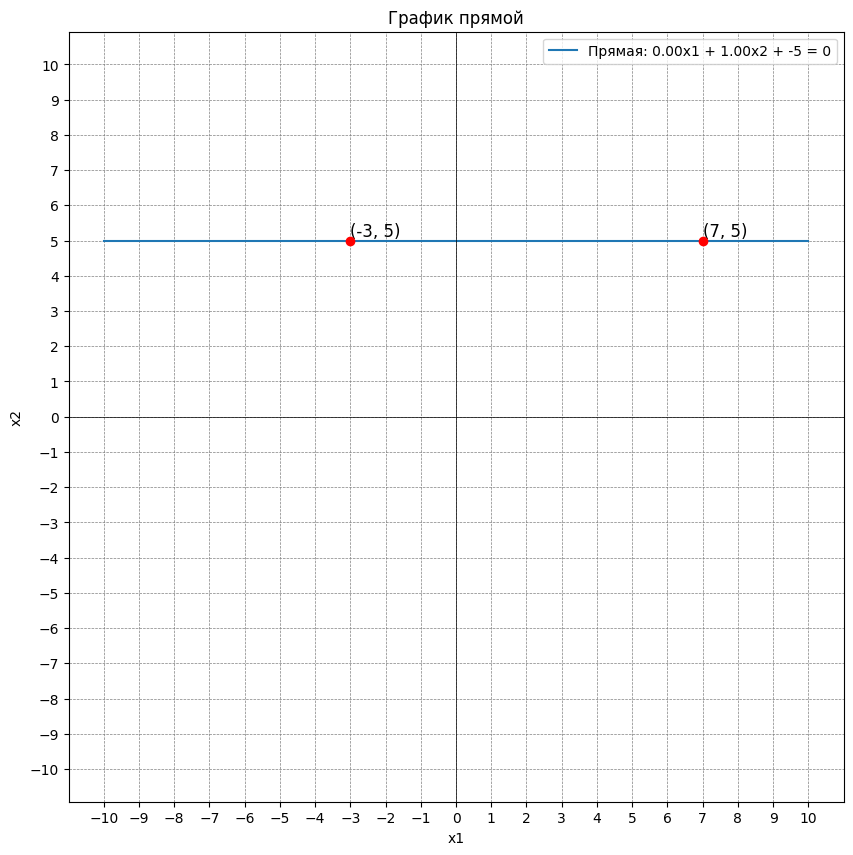

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Координаты точек
points = [[7, 5], [-3, 5]]

# Объявляем переменные
w1, w2 = sp.symbols('w1 w2')  # символьные переменные для коэффициентов w1 и w2
w0 = -5  # смещение w0

# Составляем уравнения на основе координат точек
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in points]

# Решаем систему уравнений для w1 и w2
solution = sp.solve(equations, (w1, w2))

w1_value = solution[w1]
w2_value = solution[w2]

# Определяем диапазон значений x для построения прямой
x_values = np.linspace(-10, 10, 400)
y_values = - (w1_value * x_values + w0) / w2_value

# Создаем график
plt.figure(figsize=(10, 10))  # Размер графика можно настроить по вашему усмотрению
plt.plot(x_values, y_values, label=f'Прямая: {w1_value:.2f}x1 + {w2_value:.2f}x2 + {w0} = 0')

# Отмечаем точки
x_coords, y_coords = zip(*points)
plt.scatter(x_coords, y_coords, color='red', zorder=5)
for (x, y) in points:
    plt.text(x, y, f'({x}, {y})', fontsize=12, verticalalignment='bottom')

# Настройки графика
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('График прямой')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Устанавливаем равные масштабы для осей
plt.axis('equal')

# Настраиваем метки осей с шагом 1
plt.xticks(np.arange(-10, 11, 1))  # Устанавливаем метки оси x от -10 до 10 с шагом 1
plt.yticks(np.arange(-10, 11, 1))  # Устанавливаем метки оси y от -10 до 10 с шагом 1

plt.show()
